# Capstone Project  Part 2

## Importing libraries

In [1]:
import os 
os.chdir('D:\\PY\\Jupyter\\Capstone_part_2')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Importing cleaned dataset

In [4]:
df_cl=pd.read_excel('df_clean.xlsx',index_col='AccountID')
df_cl.drop('Unnamed: 0',axis=1,inplace=True)
df_cl.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
AccountID,,,,,,,,,,,,,,,,,,
20000,1,4,3,6,Debit Card,F,3,3,Super,2,Single,9,1,11,1,5,159.93,Mobile
20001,1,0,1,8,UPI,M,3,4,Regular Plus,3,Single,7,1,15,0,0,120.90,Mobile
20002,1,0,1,30,Debit Card,M,2,4,Regular Plus,3,Single,6,1,14,0,3,165.25,Mobile
20003,1,0,3,15,Debit Card,M,2,4,Super,5,Single,8,0,23,0,3,134.07,Mobile
20004,1,0,1,12,Credit Card,M,2,3,Regular Plus,5,Single,3,0,11,1,3,129.60,Mobile


In [6]:
df_trf=pd.read_excel('df_transf.xlsx')
df_trf.drop('Unnamed: 0',axis=1,inplace=True)
df_trf.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,1.414214,3,0,Debit Card,F,3,3,Super,2,Single,5,1,2.397895,0.0,1.495349,4,Mobile
1,1,0.000000,1,0,UPI,M,3,4,Regular Plus,3,Single,4,1,2.708050,0.0,0.000000,0,Mobile
2,1,0.000000,1,5,Debit Card,M,2,4,Regular Plus,3,Single,3,1,2.639057,0.0,1.316074,4,Mobile
3,1,0.000000,3,2,Debit Card,M,2,4,Super,5,Single,4,0,3.135494,0.0,1.316074,1,Mobile
4,1,0.000000,1,1,Credit Card,M,2,3,Regular Plus,5,Single,1,0,2.397895,0.0,1.316074,1,Mobile


#### info

#### column Datatype

In [7]:
num0=['Tenure',
 'CC_Contacted_LY',
 'Account_user_count',
 'rev_per_month',
 'rev_growth_yoy',
 'coupon_used_for_payment',
 'Day_Since_CC_connect',
 'cashback']
cat0=['Churn',
 'City_Tier',
 'Payment',
 'Gender',
 'Service_Score',
 'account_segment',
 'CC_Agent_Score',
 'Marital_Status',
 'Complain_ly',
 'Login_device']
cat_str0=['Payment', 'account_segment', 'Marital_Status', 'Login_device']

In [8]:
def seperate_datatype(df):
    cat=[]
    num=[]
    numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    categ=['category','object']
    num = df.select_dtypes(include=numerics).columns
    cat = df.select_dtypes(include=categ).columns
    cat_str=[]
    for i in cat:
        li=df[i].unique().tolist()
        li=[x for x in li if pd.isnull(x) == False]
        if type(li[0])==str:
            cat_str.append(i)
    return num.tolist(),cat.tolist(),cat_str

In [9]:
for i in cat0:
    df_cl[i]=pd.Categorical(df_cl[i])
#     df_imRF[i]=pd.Categorical(df_imRF[i])

#### Re Enconding data

In [15]:
df2=df_cl.copy()
target='Churn'
num,cat,cat_str=seperate_datatype(df2)
df_tmp=df_cl.copy()
## One heat encoding for 'Payment', 'account_segment', 'Marital_Status', 'Login_device'
cat_oh=cat_str
cat_oh.remove('Gender')
df_tmp1=pd.get_dummies(df_tmp,columns=cat_oh)
## Binary encoding for gender
df_tmp1['Gender']=df_tmp1['Gender'].replace({'F':1,'M':0})
df_tf=df_tmp1.copy()
df_tf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11260 entries, 20000 to 31259
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Churn                         11260 non-null  category
 1   Tenure                        11260 non-null  int64   
 2   City_Tier                     11260 non-null  category
 3   CC_Contacted_LY               11260 non-null  int64   
 4   Gender                        11260 non-null  int64   
 5   Service_Score                 11260 non-null  category
 6   Account_user_count            11260 non-null  int64   
 7   CC_Agent_Score                11260 non-null  category
 8   rev_per_month                 11260 non-null  int64   
 9   Complain_ly                   11260 non-null  category
 10  rev_growth_yoy                11260 non-null  int64   
 11  coupon_used_for_payment       11260 non-null  int64   
 12  Day_Since_CC_connect          11260 non-nu

In [10]:
df_t=df_trf.copy()
target='Churn'
num,cat,cat_str=seperate_datatype(df_t)
df_tmp=df_cl.copy()
## One heat encoding for 'Payment', 'account_segment', 'Marital_Status', 'Login_device'
cat_oh=cat_str
cat_oh.remove('Gender')
df_tmp1=pd.get_dummies(df_tmp,columns=cat_oh)
## Binary encoding for gender
df_tmp1['Gender']=df_tmp1['Gender'].replace({'F':1,'M':0})
df_tff=df_tmp1.copy()
df_tff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11260 entries, 20000 to 31259
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Churn                         11260 non-null  category
 1   Tenure                        11260 non-null  int64   
 2   City_Tier                     11260 non-null  category
 3   CC_Contacted_LY               11260 non-null  int64   
 4   Gender                        11260 non-null  int64   
 5   Service_Score                 11260 non-null  category
 6   Account_user_count            11260 non-null  int64   
 7   CC_Agent_Score                11260 non-null  category
 8   rev_per_month                 11260 non-null  int64   
 9   Complain_ly                   11260 non-null  category
 10  rev_growth_yoy                11260 non-null  int64   
 11  coupon_used_for_payment       11260 non-null  int64   
 12  Day_Since_CC_connect          11260 non-nu

#### Outlier Removal

In [40]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [41]:
def Outlier_analysis(data,target,col2):
    df_temp=data
    LL, UL = remove_outlier(df_temp[col2])
    TT=df_temp[df_temp[col2] > UL].shape[0] +df_temp[df_temp[col2] < LL].shape[0] 
    df_temp_0=df_temp.groupby(target).get_group(0).copy()
    df_temp_1=df_temp.groupby(target).get_group(1).copy()
    LL0, UL0 = remove_outlier(df_temp_0[col2])
    TT0=df_temp_0[df_temp_0[col2] > UL0].shape[0] +df_temp_0[df_temp_0[col2] < LL0].shape[0]
    LL1, UL1 = remove_outlier(df_temp_1[col2])
    TT1=df_temp_1[df_temp_1[col2] > UL1].shape[0] +df_temp_1[df_temp_1[col2] < LL1].shape[0]
    df_tb=pd.DataFrame([TT0,TT1,TT,(TT0+TT1)],index=['Out_wrt_0','Out_wtr_1','Outliers','Total_out_wtr_1,0'],columns=[col2]).T
    return df_tb

In [42]:
num

['Tenure',
 'CC_Contacted_LY',
 'Account_user_count',
 'rev_per_month',
 'rev_growth_yoy',
 'coupon_used_for_payment',
 'Day_Since_CC_connect',
 'cashback']

In [43]:
df_out=df_tf.copy()
for i in num:
    LL, UL = remove_outlier(df_out[i])
    df_out[i] = np.where(df_out[i] > UL, UL, df_out[i])
    df_out[i] = np.where(df_out[i] < LL, LL, df_out[i])

In [44]:
df_out0=df_tff.copy()
for i in num:
    LL, UL = remove_outlier(df_out0[i])
    df_out0[i] = np.where(df_out0[i] > UL, UL, df_out0[i])
    df_out0[i] = np.where(df_out0[i] < LL, LL, df_out0[i])

In [45]:
df_imRF=pd.read_excel('df_impRF.xlsx',index_col='AccountID')
df_imRF.drop('Unnamed: 0',axis=1,inplace=True)

In [46]:
df_out1=df_imRF.copy()
for i in num:
    LL, UL = remove_outlier(df_out1[i])
    df_out1[i] = np.where(df_out1[i] > UL, UL, df_out1[i])
    df_out1[i] = np.where(df_out1[i] < LL, LL, df_out1[i])

In [47]:
cat_str

['Payment', 'account_segment', 'Marital_Status', 'Login_device']

In [48]:
df2=df_out1.copy()
target='Churn'
num,cat,cat_str=seperate_datatype(df_cl)
df_tmp=df_cl.copy()
## One heat encoding for 'Payment', 'account_segment', 'Marital_Status', 'Login_device'
cat_oh=cat_str
cat_oh.remove('Gender')
df_tmp1=pd.get_dummies(df_tmp,columns=cat_oh,drop_first=True)
## Binary encoding for gender
# df_tmp1['Gender']=df_tmp1['Gender'].replace({'F':1,'M':0})
df_tf1=df_tmp1.copy()
df_tf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11260 entries, 20000 to 31259
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Churn                         11260 non-null  category
 1   Tenure                        11260 non-null  int64   
 2   City_Tier                     11260 non-null  category
 3   CC_Contacted_LY               11260 non-null  int64   
 4   Gender                        11260 non-null  category
 5   Service_Score                 11260 non-null  category
 6   Account_user_count            11260 non-null  int64   
 7   CC_Agent_Score                11260 non-null  category
 8   rev_per_month                 11260 non-null  int64   
 9   Complain_ly                   11260 non-null  category
 10  rev_growth_yoy                11260 non-null  int64   
 11  coupon_used_for_payment       11260 non-null  int64   
 12  Day_Since_CC_connect          11260 non-nu

In [155]:
def assign_num(data,col):
    data=data.copy()
    l0=list(data[col].unique())
    if data[col].isnull().sum() !=0:
        l0=[x for x in l0 if pd.isnull(x) == False]
    d0={} 
    l0.sort()
    k=0
    for i in l0:
        d0[i]=k
        k=k+1
    data[col].replace(d0,inplace=True)
    print(data[col].isnull().sum())
    return data[col],d0

In [49]:
def model_analysis(data,target,model_type,Ratio=0.30,print_values=False,
                   Scaled=False,apply_smote=[False,0.30],Test=False,Train=False,RA=False,
                  model_name='DEF',out_rem=False):
    dft=data
    col=target
    df4=dft.copy()
    X=df4.drop([col],axis=1)
    Y=df4[col]
    ## Scaling
    if Scaled==True:
        from sklearn.preprocessing import StandardScaler
        ss=StandardScaler()
        Xs=ss.fit_transform(X) 
        X=pd.DataFrame(Xs,columns=X.columns)
    ## Train test split
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=Ratio, random_state=1,stratify=Y)
    
    ## SMOTE
    
    if apply_smote[0]==True:
        sm_rt=apply_smote[1]
        from imblearn.over_sampling import SMOTE 
        sm = SMOTE(random_state=0,sampling_strategy = sm_rt)
        x_train, y_train = sm.fit_resample(x_train, y_train)
        res=pd.concat([x_train,y_train],axis=1)
        res.dropna(inplace=True)
        x_train=res.drop([col],axis=1)
        y_train=res[col]
    model=model_type.fit(x_train,y_train)
#     train_pred=model.predict(x_train)
#     test_pred=model.predict(x_test)
    Train_score=model.score(x_train,y_train)
    Test_score=model.score(x_test,y_test)
    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)

    if print_values==True:
        print('Train_score:',model.score(x_train,y_train))
        print('Test_score:',model.score(x_test,y_test))
        print('Train Data')
        from collections import Counter
        print(Counter(y_train))
        print(metrics.classification_report(y_train, y_train_predict))
        cm=metrics.confusion_matrix(y_train, y_train_predict, labels=[0,1])

        df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
        plt.figure(figsize = (3,2))
        sns.heatmap(df_cm, annot=True ,fmt='g')
        plt.show()
        print('Test Data')
        print(Counter(y_test))
        print(metrics.classification_report(y_test, y_test_predict))
        cm=metrics.confusion_matrix(y_test, y_test_predict, labels=[0,1])

        df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
        plt.figure(figsize = (3,2))
        sns.heatmap(df_cm, annot=True ,fmt='g')
        plt.show()
    if RA==True:
        pred_prob_train = model.predict_proba(x_train)
        pred_prob_test = model.predict_proba(x_test)
        auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
        print('AUC for the Training Data: %.3f' % auc)
        fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.plot(fpr, tpr, marker='.',label = 'Training Data')
        auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
        print('AUC for the Test Data: %.3f' % auc)
        fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.plot(fpr, tpr, marker='.',label='Test Data')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('AUC_Graph')
        plt.legend(loc='best')
        plt.show()
    dfts=pd.DataFrame(classification_report(y_test, y_test_predict,output_dict=True))
    tbts=dfts.T.copy()
    tbts['accuracy']=dfts['accuracy'][0]
    tbts.drop('support',axis=1,inplace=True)
    tbts1=pd.DataFrame({'Model':[model_name]*2,'Test/Train':['Test']*2})
    tbts2=tbts[0:2].reset_index().copy()
    tbts3=pd.concat([tbts1,tbts2],axis=1)
    tbts3.rename(columns={'index':'0/1'},inplace=True)

    dftr=pd.DataFrame(classification_report(y_train, y_train_predict,output_dict=True))
    tbtr=dftr.T.copy()
    tbtr['accuracy']=dftr['accuracy'][0]
    tbtr.drop('support',axis=1,inplace=True)
    tbtr1=pd.DataFrame({'Model':[model_name]*2,'Test/Train':['Train']*2})
    tbtr2=tbtr[0:2].reset_index().copy()
    tbtr3=pd.concat([tbtr1,tbtr2],axis=1)
    tbtr3.rename(columns={'index':'0/1'},inplace=True)
    if RA==True:
        tbts3['AUC']= metrics.roc_auc_score(y_test,pred_prob_test[:,1])
        tbtr3['AUC']= metrics.roc_auc_score(y_train,pred_prob_train[:,1])
    else:
        tbts3['AUC']= np.nan
        tbtr3['AUC']= np.nan
    tb=pd.concat([tbtr3,tbts3],axis=0)
    if apply_smote[0]==True :
        tb['SMOTE']=True
    else:
        tb['SMOTE']=False
    if out_rem==True :
        tb['out_rem']=True
    else:
        tb['out_rem']=False
    tb.reset_index(inplace=True)
    tb.drop(['index'],inplace=True,axis=1)
    tmp=tb[(tb['Test/Train']=='Test') & (tb['0/1']=='1')].copy()
    acct=round(float(tmp['accuracy']),3)
    auct=round(float(tmp['AUC']),3)
    pr1=round(float(tmp['precision']),3)
    rc1=round(float(tmp['recall']),3)
    f11=round(float(tmp['f1-score']),3)
    trsc,tssc=Train_score,Test_score
    print('Inference')
    if trsc-tssc>=0.10:
        print('\t We have overfitting model ')
    elif trsc<= 0.60:
        print('\t We have a underfitting model')

    print('\t We have a {}  accuracy of {} in test data'.format(rating(acct),acct))
    print('\t We have a {} AUC of {} in test data'.format(rating(auct),auct))
    print('\t Based on priority of churning')
    print('\t Precision  of 1= {}, {} value '.format(pr1,rating(pr1)))
    print('\t Recall or sensitivity of 1 = {}, {} value '.format(rc1,rating(rc1)))
    print('\t f1 score of 1 = {}, {} value '.format(f11,rating(f11)))
    return tb,model

In [50]:
def rating(val):
    if val >0.95:
        return 'very good'
    elif val>0.85:
        return 'good'
    elif val >0.75:
        return 'medium'  
    elif val>0.65:
        return 'bad'
    else:
        return "very bad"

In [51]:
def GS_analysis(data,target,param_grid,model_type,Ratio=0.30,print_values=False,
                   Scaled=False,apply_smote=[False,0.30],RA=False,
                  model_name='DEF',out_rem=False):
    dft=data
    col=target
    df4=dft.copy()
    X=df4.drop([col],axis=1)
    Y=df4[col]
    ## Scaling
    if Scaled==True:
        from sklearn.preprocessing import StandardScaler
        ss=StandardScaler()
        Xs=ss.fit_transform(X) 
        X=pd.DataFrame(Xs,columns=X.columns)
    ## Train test split
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=Ratio, random_state=1,stratify=Y)
    
    ## SMOTE
    
    if apply_smote[0]==True:
        sm_rt=apply_smote[1]
        from imblearn.over_sampling import SMOTE 
        sm = SMOTE(random_state=0,sampling_strategy = sm_rt)
        x_train, y_train = sm.fit_resample(x_train, y_train)
        res=pd.concat([x_train,y_train],axis=1)
        res.dropna(inplace=True)
        x_train=res.drop([col],axis=1)
        y_train=res[col]
    model= GridSearchCV(estimator=model_type,
                               param_grid=param_grid,scoring = 'precision',
                               n_jobs = -1,
                               cv = 3)
    model.fit(x_train, y_train)
    print('Best Parameters',model.best_params_)
    print('Best Score:',model.best_score_)
    Test_score=model.score(x_test,y_test)
    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)
    if print_values==True:
        print('Train Data')
        from collections import Counter
        print(Counter(y_train))
        print('Test Data')
        print(Counter(y_test))
        print(metrics.classification_report(y_test, y_test_predict))
        cm=metrics.confusion_matrix(y_test, y_test_predict, labels=[0,1])

        df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
        plt.figure(figsize = (3,2))
        sns.heatmap(df_cm, annot=True ,fmt='g')
        plt.show()
    if RA==True:
        pred_prob_train = model.predict_proba(x_train)
        pred_prob_test = model.predict_proba(x_test)
        auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
        print('AUC for the Test Data: %.3f' % auc)
        fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.plot(fpr, tpr, marker='.',label='Test Data')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('AUC_Graph')
        plt.legend(loc='best')
        plt.show()
    dfts=pd.DataFrame(classification_report(y_test, y_test_predict,output_dict=True))
    tbts=dfts.T.copy()
    tbts['accuracy']=dfts['accuracy'][0]
    tbts.drop('support',axis=1,inplace=True)
    tbts1=pd.DataFrame({'Model':[model_name]*2,'Test/Train':['Test']*2})
    tbts2=tbts[0:2].reset_index().copy()
    tbts3=pd.concat([tbts1,tbts2],axis=1)
    tbts3.rename(columns={'index':'0/1'},inplace=True)
    tbts3['Best_Score']=model.best_score_
    if RA==True:
        tbts3['AUC']= metrics.roc_auc_score(y_test,pred_prob_test[:,1])
    else:
        tbts3['AUC']= np.nan
    if apply_smote[0]==True :
        tbts3['SMOTE']=True
    else:
        tbts3['SMOTE']=False
    if out_rem==True :
        tbts3['out_rem']=True
    else:
        tbts3['out_rem']=False
    tmp=tbts3[(tbts3['Test/Train']=='Test') & (tbts3['0/1']=='1')].copy()
    acct=round(float(tmp['accuracy']),3)
    auct=round(float(tmp['AUC']),3)
    pr1=round(float(tmp['precision']),3)
    rc1=round(float(tmp['recall']),3)
    f11=round(float(tmp['f1-score']),3)
#     trsc,tssc=Train_score,Test_score
    print('Inference')
#     if trsc-tssc>=0.10:
#         print('\t We have overfitting model ')
#     elif trsc<= 0.60:
#         print('\t We have a underfitting model')
    print('\t We have performed cross validation thrice with best score of {}'.format(round(model.best_score_,3)))
    print('\t The best parameters are ',model.best_params_)
    print('\t We have a {}  accuracy of {} in test data'.format(rating(acct),acct))
    print('\t We have a {} AUC of {} in test data'.format(rating(auct),auct))
    print('\t Based on priority of churning')
    print('\t Precision  of 1= {}, {} value '.format(pr1,rating(pr1)))
    print('\t Recall or sensitivity of 1 = {}, {} value '.format(rc1,rating(rc1)))
    print('\t f1 score of 1 = {}, {} value '.format(f11,rating(f11)))
    return tbts3,model

# Logistic Regression

## Stats

### VIF

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [53]:
data=df_out1.copy()
col='Target'
tbl=calc_vif(data)
tbl.sort_values(by='VIF',ascending=False)

,variables,VIF
16,cashback,21.040658
6,Service_Score,19.466909
7,Account_user_count,18.206970
13,rev_growth_yoy,16.286221
9,CC_Agent_Score,5.649671
3,CC_Contacted_LY,5.315435
11,rev_per_month,4.715002
2,City_Tier,4.583560
8,account_segment,4.558729
4,Payment,4.214037


In [54]:
lmn=[]
while float(tbl.sort_values(by='VIF',ascending=False).head(1)['VIF'])>=4:
    mn=list(tbl.sort_values(by='VIF',ascending=False).head(1)['variables'])
    lmn.append(mn[0])
    tbl=calc_vif(data.drop(lmn,axis=1))
else:
   display(tbl.sort_values(by='VIF',ascending=False))

,variables,VIF
4,account_segment,3.801149
2,Payment,3.495346
5,Marital_Status,3.445116
7,coupon_used_for_payment,3.081137
8,Day_Since_CC_connect,3.045925
9,Login_device,3.011919
1,Tenure,2.529434
3,Gender,2.289716
6,Complain_ly,1.485787
0,Churn,1.465402


In [55]:
col='Churn'
df4=df_out1.copy()

for i in cat:
    df4[i]=pd.to_numeric(df4[i])
Y=df4[col]
X=df4.drop(col,axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42,stratify = Y)
sm_rt=0.34
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=0,sampling_strategy = sm_rt)
x_train, y_train = sm.fit_resample(x_train, y_train)
res=pd.concat([x_train,y_train],axis=1)
res.dropna(inplace=True)
x_train=res.drop([col],axis=1)
y_train=res[col]
Default_train = pd.concat([x_train, y_train], axis = 1)
Default_test = pd.concat([x_test, y_test], axis = 1)

In [56]:
lmn1=list(tbl['variables'])
l=['Churn']
for j in l :
    if j in lmn1:
        lmn1.remove(j)
m1='Churn ~ '
for i in lmn1:
    m1+=str(i)+' + '
m1[0:-2]

'Churn ~ Tenure + Payment + Gender + account_segment + Marital_Status + Complain_ly + coupon_used_for_payment + Day_Since_CC_connect + Login_device '

In [57]:
lmn1=list(tbl['variables'])
l=['Churn']
l.append('Gender')

for j in l :
    if j in lmn1:
        lmn1.remove(j)
m2='Churn ~ '
for i in lmn1:
    m2+=str(i)+' + '
m2[0:-2]

'Churn ~ Tenure + Payment + account_segment + Marital_Status + Complain_ly + coupon_used_for_payment + Day_Since_CC_connect + Login_device '

In [58]:
import statsmodels.formula.api as SM
lr_1= SM.logit(formula = m2[0:-2], data= Default_train).fit()
lr_1.summary()

Optimization terminated successfully.
         Current function value: 0.410490
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 8407
Model:                          Logit   Df Residuals:                     8398
Method:                           MLE   Df Model:                            8
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.2752
Time:                        12:14:15   Log-Likelihood:                -3451.0
converged:                       True   LL-Null:                       -4761.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.8071      0.126      6.381      0.000       0.559       1.055
Tenure                     -0.1786      0.006    -30.403      0.000      -0.190      -0.167
Payment                    -0.1621      0.030     -5.463      0.000      -0.220      -0.104
account_segment            -0.3585      0.031    -11.493      0.000      -0.420      -0.297
Marital_Status              0.3216      0.045      7.169      0.000       0.234       0.409
Complain_ly                 1.1850      0.064     18.646      0.000       1.060       1.310
coupon_used_for_payment     0.2178      0.031      7.027      0.000       0.157       0.279
Day_Since_CC_connect       -0.1128      0.011    -10.426      0.000      -0.134      -0.092
Login_device               -0.5301      0.063     -8.405      0.000      -0.654      -0.407
===========================================================================================
"""

Train Data
Counter({0: 6274, 1: 2133})
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      6274
           1       0.73      0.53      0.62      2133

    accuracy                           0.83      8407
   macro avg       0.79      0.73      0.75      8407
weighted avg       0.82      0.83      0.82      8407



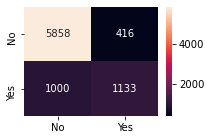

Test Data
Counter({0: 3090, 1: 626})
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3090
           1       0.59      0.52      0.56       626

    accuracy                           0.86      3716
   macro avg       0.75      0.73      0.74      3716
weighted avg       0.85      0.86      0.86      3716



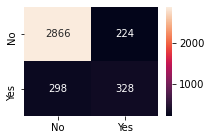

AUC for the Training Data: 0.851
AUC for the Test Data: 0.844


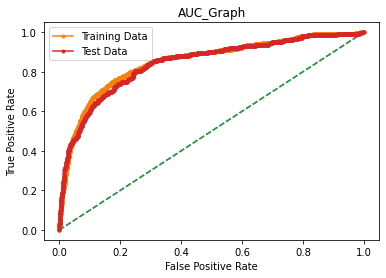

Inference
	 We have a good  accuracy of 0.86 in test data
	 We have a medium AUC of 0.844 in test data
	 Based on priority of churning
	 Precision  of 1= 0.594, very bad value 
	 Recall or sensitivity of 1 = 0.524, very bad value 
	 f1 score of 1 = 0.557, very bad value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem
0,LR_ST,Train,0,0.854185,0.933695,0.892172,0.831569,0.850603,True,True
1,LR_ST,Train,1,0.731440,0.531177,0.615426,0.831569,0.850603,True,True
2,LR_ST,Test,0,0.905815,0.927508,0.916533,0.859526,0.843578,True,True
3,LR_ST,Test,1,0.594203,0.523962,0.556876,0.859526,0.843578,True,True


In [59]:
model=lr_1
print_values=True
RA=True
model_name='LR_ST'
out_rem=True 
apply_smote=[True,0.34]
# Train_score=model.score(x_train,y_train)
# Test_score=model.score(x_test,y_test)
y_train_predict = np.where(lr_1.predict(Default_train) > 0.5, 1, 0)
y_test_predict = np.where(lr_1.predict(Default_test) > 0.5, 1, 0)
if print_values==True:
    print('Train Data')
    from collections import Counter
    print(Counter(y_train))
    print(metrics.classification_report(y_train, y_train_predict))
    cm=metrics.confusion_matrix(y_train, y_train_predict, labels=[0,1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
              columns = [i for i in ["No","Yes"]])
    plt.figure(figsize = (3,2))
    sns.heatmap(df_cm, annot=True ,fmt='g')
    plt.show()
    print('Test Data')
    print(Counter(y_test))
    print(metrics.classification_report(y_test, y_test_predict))
    cm=metrics.confusion_matrix(y_test, y_test_predict, labels=[0,1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
              columns = [i for i in ["No","Yes"]])
    plt.figure(figsize = (3,2))
    sns.heatmap(df_cm, annot=True ,fmt='g')
    plt.show()
if RA==True:
    pred_prob_train = model.predict(Default_train)
    pred_prob_test = model.predict(Default_test)
    auc = metrics.roc_auc_score(y_train,pred_prob_train.to_list())
    print('AUC for the Training Data: %.3f' % auc)
    fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train.to_list())
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.',label = 'Training Data')
    auc = metrics.roc_auc_score(y_test,pred_prob_test.to_list())
    print('AUC for the Test Data: %.3f' % auc)
    fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test.to_list())
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.',label='Test Data')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC_Graph')
    plt.legend(loc='best')
    plt.show()
dfts=pd.DataFrame(classification_report(y_test, y_test_predict,output_dict=True))
lrsts=dfts.T.copy()
lrsts['accuracy']=dfts['accuracy'][0]
lrsts.drop('support',axis=1,inplace=True)
lrsts1=pd.DataFrame({'Model':[model_name]*2,'Test/Train':['Test']*2})
lrsts2=lrsts[0:2].reset_index().copy()
lrsts3=pd.concat([lrsts1,lrsts2],axis=1)
lrsts3.rename(columns={'index':'0/1'},inplace=True)
dftr=pd.DataFrame(classification_report(y_train, y_train_predict,output_dict=True))
lrstr=dftr.T.copy()
lrstr['accuracy']=dftr['accuracy'][0]
lrstr.drop('support',axis=1,inplace=True)
lrstr1=pd.DataFrame({'Model':[model_name]*2,'Test/Train':['Train']*2})
lrstr2=lrstr[0:2].reset_index().copy()
lrstr3=pd.concat([lrstr1,lrstr2],axis=1)
lrstr3.rename(columns={'index':'0/1'},inplace=True)
if RA==True:
    lrsts3['AUC']= metrics.roc_auc_score(y_test,pred_prob_test.to_list())
    lrstr3['AUC']= metrics.roc_auc_score(y_train,pred_prob_train.to_list())
else:
    lrsts3['AUC']= np.nan
    lrstr3['AUC']= np.nan
lrs=pd.concat([lrstr3,lrsts3],axis=0)
if apply_smote[0]==True :
    lrs['SMOTE']=True
else:
    lrs['SMOTE']=False
if out_rem==True :
    lrs['out_rem']=True
else:
    lrs['out_rem']=False
lrs.reset_index(inplace=True)
lrs.drop(['index'],inplace=True,axis=1)
tmp=lrs[(lrs['Test/Train']=='Test') & (lrs['0/1']=='1')].copy()
acct=round(float(tmp['accuracy']),3)
auct=round(float(tmp['AUC']),3)
pr1=round(float(tmp['precision']),3)
rc1=round(float(tmp['recall']),3)
f11=round(float(tmp['f1-score']),3)
# trsc,tssc=Train_score,Test_score
print('Inference')
print('\t We have a {}  accuracy of {} in test data'.format(rating(acct),acct))
print('\t We have a {} AUC of {} in test data'.format(rating(auct),auct))
print('\t Based on priority of churning')
print('\t Precision  of 1= {}, {} value '.format(pr1,rating(pr1)))
print('\t Recall or sensitivity of 1 = {}, {} value '.format(rc1,rating(rc1)))
print('\t f1 score of 1 = {}, {} value '.format(f11,rating(f11)))
lrs

In [60]:
model = LogisticRegression(random_state = 0,n_jobs = -1)

Train_score: 0.8771885308297387
Test_score: 0.8789224393132031
Train Data
Counter({0: 6555, 1: 1327})
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6555
           1       0.74      0.42      0.54      1327

    accuracy                           0.88      7882
   macro avg       0.81      0.70      0.73      7882
weighted avg       0.87      0.88      0.86      7882



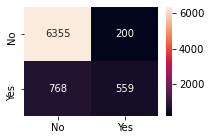

Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2809
           1       0.75      0.43      0.54       569

    accuracy                           0.88      3378
   macro avg       0.82      0.70      0.74      3378
weighted avg       0.87      0.88      0.86      3378



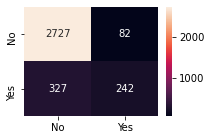

AUC for the Training Data: 0.866
AUC for the Test Data: 0.847


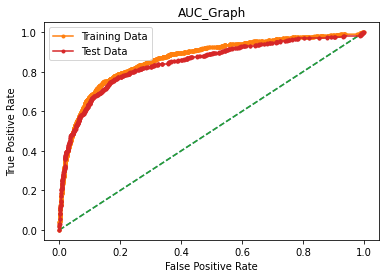

Inference
	 We have a good  accuracy of 0.879 in test data
	 We have a medium AUC of 0.847 in test data
	 Based on priority of churning
	 Precision  of 1= 0.747, bad value 
	 Recall or sensitivity of 1 = 0.425, very bad value 
	 f1 score of 1 = 0.542, very bad value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem
0,lr,Train,0,0.892,0.969,0.929,0.877,0.866,False,False
1,lr,Train,1,0.736,0.421,0.536,0.877,0.866,False,False
2,lr,Test,0,0.893,0.971,0.930,0.879,0.847,False,False
3,lr,Test,1,0.747,0.425,0.542,0.879,0.847,False,False


In [61]:
## lr model 1

target='Churn'
data=df_tf.copy()
name='lr'
model_type=LogisticRegression(random_state = 0,n_jobs = -1)

lr1,mlr1=model_analysis(data,target,model_type,Ratio=0.30,print_values=True,Scaled=False,
                   apply_smote=[False,0.30],Test=False,Train=False,RA=True,
                   out_rem=False,model_name=name)
round(lr1,3)

Train_score: 0.8827708703374778
Test_score: 0.8842510361160449
Train Data
Counter({0: 6555, 1: 1327})
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6555
           1       0.74      0.47      0.57      1327

    accuracy                           0.88      7882
   macro avg       0.82      0.72      0.75      7882
weighted avg       0.87      0.88      0.87      7882



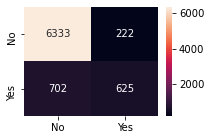

Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2809
           1       0.74      0.48      0.58       569

    accuracy                           0.88      3378
   macro avg       0.82      0.72      0.76      3378
weighted avg       0.87      0.88      0.87      3378



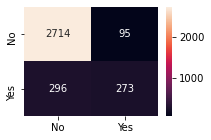

AUC for the Training Data: 0.876
AUC for the Test Data: 0.855


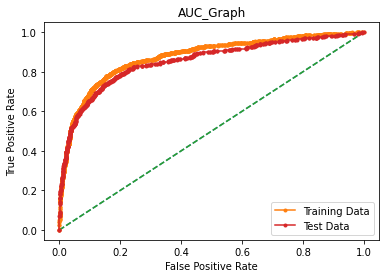

Inference
	 We have a good  accuracy of 0.884 in test data
	 We have a good AUC of 0.855 in test data
	 Based on priority of churning
	 Precision  of 1= 0.742, bad value 
	 Recall or sensitivity of 1 = 0.48, very bad value 
	 f1 score of 1 = 0.583, very bad value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem
0,lr,Train,0,0.900,0.966,0.932,0.883,0.876,False,True
1,lr,Train,1,0.738,0.471,0.575,0.883,0.876,False,True
2,lr,Test,0,0.902,0.966,0.933,0.884,0.855,False,True
3,lr,Test,1,0.742,0.480,0.583,0.884,0.855,False,True


In [62]:
## lr model 2

target='Churn'
data=df_out.copy()
name='lr'
model_type=LogisticRegression(random_state = 0,n_jobs = -1)

lr2,mlr2=model_analysis(data,target,model_type,Ratio=0.30,print_values=True,Scaled=False,
                   apply_smote=[False,0.30],Test=False,Train=False,RA=True,
                   out_rem=True,model_name=name)
round(lr2,3)

Train_score: 0.8796147672552167
Test_score: 0.8866193013617525
Train Data
Counter({0: 6555, 1: 1544})
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      6555
           1       0.75      0.55      0.64      1544

    accuracy                           0.88      8099
   macro avg       0.83      0.75      0.78      8099
weighted avg       0.87      0.88      0.87      8099



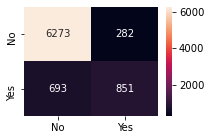

Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2809
           1       0.73      0.52      0.61       569

    accuracy                           0.89      3378
   macro avg       0.82      0.74      0.77      3378
weighted avg       0.88      0.89      0.88      3378



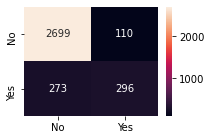

AUC for the Training Data: 0.883
AUC for the Test Data: 0.861


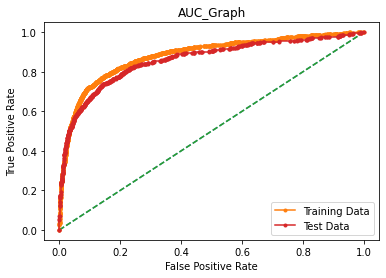

Inference
	 We have a good  accuracy of 0.887 in test data
	 We have a good AUC of 0.861 in test data
	 Based on priority of churning
	 Precision  of 1= 0.729, bad value 
	 Recall or sensitivity of 1 = 0.52, very bad value 
	 f1 score of 1 = 0.607, very bad value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem
0,lr,Train,0,0.901,0.957,0.928,0.880,0.883,True,True
1,lr,Train,1,0.751,0.551,0.636,0.880,0.883,True,True
2,lr,Test,0,0.908,0.961,0.934,0.887,0.861,True,True
3,lr,Test,1,0.729,0.520,0.607,0.887,0.861,True,True


In [63]:
## lr model 3

target='Churn'
data=df_out.copy()
name='lr'
model_type=LogisticRegression(random_state = 0,n_jobs = -1)
sm_rt=round(data[target].value_counts(normalize=True).min(),2)*2
lr3,mlr3=model_analysis(data,target,model_type,Ratio=0.30,print_values=True,Scaled=False,
                   apply_smote=[True,sm_rt],Test=False,Train=False,RA=True,
                   out_rem=True,model_name=name)
round(lr3,3)

Train_score: 0.8796147672552167
Test_score: 0.8866193013617525
Train Data
Counter({0: 6555, 1: 1544})
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      6555
           1       0.75      0.55      0.64      1544

    accuracy                           0.88      8099
   macro avg       0.83      0.75      0.78      8099
weighted avg       0.87      0.88      0.87      8099



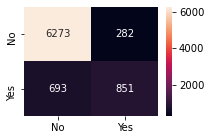

Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2809
           1       0.73      0.52      0.61       569

    accuracy                           0.89      3378
   macro avg       0.82      0.74      0.77      3378
weighted avg       0.88      0.89      0.88      3378



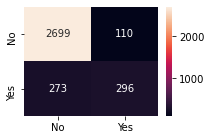

AUC for the Training Data: 0.883
AUC for the Test Data: 0.861


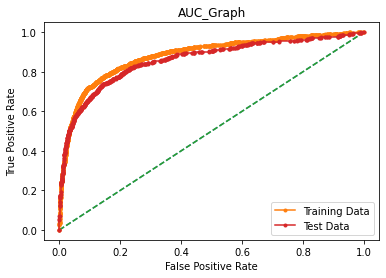

Inference
	 We have a good  accuracy of 0.887 in test data
	 We have a good AUC of 0.861 in test data
	 Based on priority of churning
	 Precision  of 1= 0.729, bad value 
	 Recall or sensitivity of 1 = 0.52, very bad value 
	 f1 score of 1 = 0.607, very bad value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem,Transform
0,lr,Train,0,0.901,0.957,0.928,0.880,0.883,True,True,True
1,lr,Train,1,0.751,0.551,0.636,0.880,0.883,True,True,True
2,lr,Test,0,0.908,0.961,0.934,0.887,0.861,True,True,True
3,lr,Test,1,0.729,0.520,0.607,0.887,0.861,True,True,True


In [128]:
## lr model 4

target='Churn'
data=df_out0.copy()
name='lr'
model_type=LogisticRegression(random_state = 0,n_jobs = -1)
sm_rt=round(data[target].value_counts(normalize=True).min(),2)*2
lr4,mlr4=model_analysis(data,target,model_type,Ratio=0.30,print_values=True,Scaled=False,
                   apply_smote=[True,sm_rt],Test=False,Train=False,RA=True,
                   out_rem=True,model_name=name)
lr4['Transform']=True
round(lr4,3)

In [129]:

lr=pd.concat([lr1,lr2,lr3,lr4,lrs],axis=0)
lr.reset_index(inplace=True)
lr.drop(['index'],axis=1,inplace=True)
lr

,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem,Transform
0,lr,Train,0,0.892180,0.969489,0.929229,0.877189,0.865814,False,False,NaN
1,lr,Train,1,0.736495,0.421251,0.535954,0.877189,0.865814,False,False,NaN
2,lr,Test,0,0.892927,0.970808,0.930240,0.878922,0.847039,False,False,NaN
3,lr,Test,1,0.746914,0.425308,0.541993,0.878922,0.847039,False,False,NaN
4,lr,Train,0,0.900213,0.966133,0.932009,0.882771,0.876334,False,True,NaN
5,lr,Train,1,0.737898,0.470987,0.574977,0.882771,0.876334,False,True,NaN
6,lr,Test,0,0.901661,0.966180,0.932806,0.884251,0.854646,False,True,NaN
7,lr,Test,1,0.741848,0.479789,0.582711,0.884251,0.854646,False,True,NaN
8,lr,Train,0,0.900517,0.956979,0.927890,0.879615,0.883306,True,True,NaN
9,lr,Train,1,0.751103,0.551166,0.635786,0.879615,0.883306,True,True,NaN


In [99]:
round(lr[lr['Test/Train']=='Test'],3)

,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem,Transform
2,lr,Test,0,0.893,0.971,0.930,0.879,0.847,False,False,NaN
3,lr,Test,1,0.747,0.425,0.542,0.879,0.847,False,False,NaN
6,lr,Test,0,0.902,0.966,0.933,0.884,0.855,False,True,NaN
7,lr,Test,1,0.742,0.480,0.583,0.884,0.855,False,True,NaN
10,lr,Test,0,0.908,0.961,0.934,0.887,0.861,True,True,NaN
11,lr,Test,1,0.729,0.520,0.607,0.887,0.861,True,True,NaN
14,lr,Test,0,0.908,0.961,0.934,0.887,0.861,True,True,True
15,lr,Test,1,0.729,0.520,0.607,0.887,0.861,True,True,True
18,LR_ST,Test,0,0.906,0.928,0.917,0.860,0.844,True,True,NaN
19,LR_ST,Test,1,0.594,0.524,0.557,0.860,0.844,True,True,NaN


In [254]:
flr4=pd.DataFrame({'Variable':list(mlr4.feature_names_in_),
              'Importance':list(mlr4.coef_[0])}).sort_values('Importance', ascending=False)
display(flr4.head(10))
display(flr4.tail(10))

,Variable,Importance
8,Complain_ly,1.539525
25,Marital_Status_Single,0.450635
18,account_segment_HNI,0.309227
5,Account_user_count,0.294357
1,City_Tier,0.272206
6,CC_Agent_Score,0.228779
16,Payment_E wallet,0.220735
13,Payment_Cash on Delivery,0.197051
19,account_segment_Regular,0.174193
7,rev_per_month,0.168121


,Variable,Importance
17,Payment_UPI,-0.124753
0,Tenure,-0.172272
15,Payment_Debit Card,-0.213954
4,Service_Score,-0.233281
23,Marital_Status_Divorced,-0.311829
3,Gender,-0.328297
27,Login_device_Mobile,-0.433093
14,Payment_Credit Card,-0.446229
24,Marital_Status_Married,-0.672036
21,account_segment_Super,-0.967793


##### Inference
    Based priority of churned customers and test score model 4 with SMOTE and Outliers removed performs best
    •	We have a good  accuracy of 0.86 in test data
    •	We have a medium AUC of 0.844 in test data
    •	Based on priority of churning
    •	Precision  of 1= 0.594, very bad value 
    •	Recall or sensitivity of 1 = 0.524, very bad value 
    •	f1 score of 1 = 0.557, very bad value 
    •	The model has train accuracy  lesser than test accuracy which isn’t good 
    •	Transformed data has no effect
    •	Complain_ly has highest positive coefficient of 1.53
    •	While account_segment_super has lowest coefficient of -0.96


Transformed data has no effect

# Random_forest

### RF model 1

Train_score: 0.9996193859426542
Test_score: 0.9695085849615157
Train Data
Counter({0: 6555, 1: 1327})
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



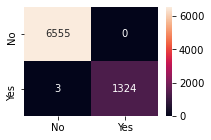

Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2809
           1       0.98      0.83      0.90       569

    accuracy                           0.97      3378
   macro avg       0.97      0.92      0.94      3378
weighted avg       0.97      0.97      0.97      3378



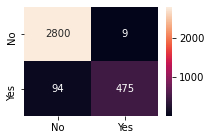

AUC for the Training Data: 1.000
AUC for the Test Data: 0.992


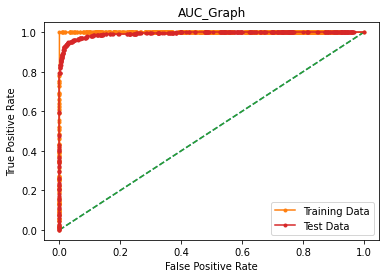

Inference
	 We have a very good  accuracy of 0.97 in test data
	 We have a very good AUC of 0.992 in test data
	 Based on priority of churning
	 Precision  of 1= 0.981, very good value 
	 Recall or sensitivity of 1 = 0.835, medium value 
	 f1 score of 1 = 0.902, good value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem
0,RF,Train,0,1.000,1.000,1.000,1.00,1.000,False,False
1,RF,Train,1,1.000,0.998,0.999,1.00,1.000,False,False
2,RF,Test,0,0.968,0.997,0.982,0.97,0.992,False,False
3,RF,Test,1,0.981,0.835,0.902,0.97,0.992,False,False


In [70]:
target='Churn'
data=df_tf.copy()
name='RF'
model_type=RandomForestClassifier(random_state=0,max_depth=15)

rf1,mrf1=model_analysis(data,target,model_type,Ratio=0.30,print_values=True,Scaled=False,
                   apply_smote=[False,0.30],Test=False,Train=False,RA=True,
                   out_rem=False,model_name=name)
round(rf1,3)

In [203]:
target='Churn'
data=df_out.copy()
X1=data.drop(target,axis=1)
frf1=pd.DataFrame({'Variable':X1.columns,
              'Importance':mrf1.feature_importances_}).sort_values('Importance', ascending=False)
display(frf1.head(10))
display(frf1.tail(10))

,Variable,Importance
0,Tenure,0.239187
12,cashback,0.077531
2,CC_Contacted_LY,0.067620
8,Complain_ly,0.063723
11,Day_Since_CC_connect,0.062843
9,rev_growth_yoy,0.054548
7,rev_per_month,0.053685
6,CC_Agent_Score,0.052206
5,Account_user_count,0.037918
10,coupon_used_for_payment,0.031457


,Variable,Importance
26,Login_device_Computer,0.014501
24,Marital_Status_Married,0.014331
13,Payment_Cash on Delivery,0.013360
16,Payment_E wallet,0.013025
21,account_segment_Super,0.012135
17,Payment_UPI,0.007754
18,account_segment_HNI,0.007590
23,Marital_Status_Divorced,0.006186
22,account_segment_Super Plus,0.003425
19,account_segment_Regular,0.002109


### RF model 2

Train_score: 0.9997462572951028
Test_score: 0.9730609828300769
Train Data
Counter({0: 6555, 1: 1327})
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



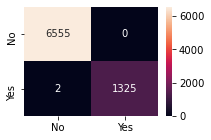

Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2809
           1       0.99      0.85      0.91       569

    accuracy                           0.97      3378
   macro avg       0.98      0.92      0.95      3378
weighted avg       0.97      0.97      0.97      3378



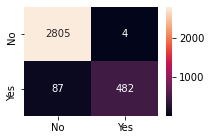

AUC for the Training Data: 1.000
AUC for the Test Data: 0.993


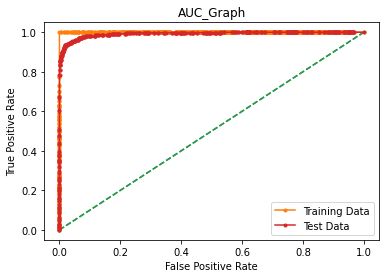

Inference
	 We have a very good  accuracy of 0.973 in test data
	 We have a very good AUC of 0.993 in test data
	 Based on priority of churning
	 Precision  of 1= 0.992, very good value 
	 Recall or sensitivity of 1 = 0.847, medium value 
	 f1 score of 1 = 0.914, good value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem
0,RF,Train,0,1.000,1.000,1.000,1.000,1.000,False,True
1,RF,Train,1,1.000,0.998,0.999,1.000,1.000,False,True
2,RF,Test,0,0.970,0.999,0.984,0.973,0.993,False,True
3,RF,Test,1,0.992,0.847,0.914,0.973,0.993,False,True


In [71]:
target='Churn'
data=df_out.copy()
name='RF'
model_type=RandomForestClassifier(random_state=0,max_depth=15)

rf2,mrf2=model_analysis(data,target,model_type,Ratio=0.30,print_values=True,Scaled=False,
                   apply_smote=[False,0.30],Test=False,Train=False,RA=True,
                   out_rem=True,model_name=name)
round(rf2,3)

In [204]:
target='Churn'
data=df_out.copy()
X1=data.drop(target,axis=1)
frf2=pd.DataFrame({'Variable':X1.columns,
              'Importance':mrf2.feature_importances_}).sort_values('Importance', ascending=False)
display(frf2.head(10))
display(frf2.tail(10))

,Variable,Importance
0,Tenure,0.235433
12,cashback,0.076744
2,CC_Contacted_LY,0.068517
11,Day_Since_CC_connect,0.063894
8,Complain_ly,0.062592
9,rev_growth_yoy,0.057275
7,rev_per_month,0.055168
6,CC_Agent_Score,0.054924
5,Account_user_count,0.037240
20,account_segment_Regular Plus,0.030376


,Variable,Importance
15,Payment_Debit Card,0.014531
26,Login_device_Computer,0.014176
13,Payment_Cash on Delivery,0.013094
16,Payment_E wallet,0.012139
21,account_segment_Super,0.011520
17,Payment_UPI,0.008321
18,account_segment_HNI,0.007940
23,Marital_Status_Divorced,0.006260
22,account_segment_Super Plus,0.003595
19,account_segment_Regular,0.002827


Train_score: 0.9992591677984937
Test_score: 0.9739490822972173
Train Data
Counter({0: 6555, 1: 1544})
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1544

    accuracy                           1.00      8099
   macro avg       1.00      1.00      1.00      8099
weighted avg       1.00      1.00      1.00      8099



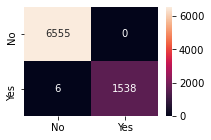

Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2809
           1       0.99      0.86      0.92       569

    accuracy                           0.97      3378
   macro avg       0.98      0.93      0.95      3378
weighted avg       0.97      0.97      0.97      3378



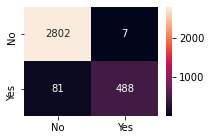

AUC for the Training Data: 1.000
AUC for the Test Data: 0.993


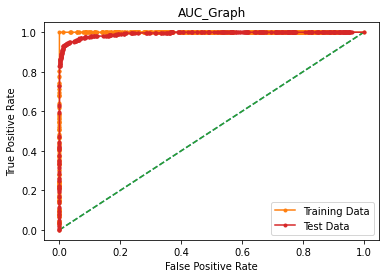

Inference
	 We have a very good  accuracy of 0.974 in test data
	 We have a very good AUC of 0.993 in test data
	 Based on priority of churning
	 Precision  of 1= 0.986, very good value 
	 Recall or sensitivity of 1 = 0.858, good value 
	 f1 score of 1 = 0.917, good value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem
0,RF,Train,0,0.999,1.000,1.000,0.999,1.000,True,True
1,RF,Train,1,1.000,0.996,0.998,0.999,1.000,True,True
2,RF,Test,0,0.972,0.998,0.985,0.974,0.993,True,True
3,RF,Test,1,0.986,0.858,0.917,0.974,0.993,True,True


In [72]:
## model 3
target='Churn'
data=df_out.copy()
name='RF'
model_type=RandomForestClassifier(random_state=0,max_depth=15)
sm_rt=round(data[target].value_counts(normalize=True).min(),2)*2
rf3,mrf3=model_analysis(data,target,model_type,Ratio=0.30,print_values=True,Scaled=False,
                   apply_smote=[True,sm_rt],Test=False,Train=False,RA=True,
                   out_rem=True,model_name=name)
round(rf3,3)

In [205]:
target='Churn'
data=df_out.copy()
X1=data.drop(target,axis=1)
frf3=pd.DataFrame({'Variable':X1.columns,
              'Importance':mrf3.feature_importances_}).sort_values('Importance', ascending=False)
display(frf3.head(10))
display(frf3.tail(10))

,Variable,Importance
0,Tenure,0.248680
12,cashback,0.075982
2,CC_Contacted_LY,0.066855
8,Complain_ly,0.063577
11,Day_Since_CC_connect,0.061590
7,rev_per_month,0.054955
9,rev_growth_yoy,0.054076
6,CC_Agent_Score,0.052544
5,Account_user_count,0.037011
20,account_segment_Regular Plus,0.028204


,Variable,Importance
15,Payment_Debit Card,0.014258
26,Login_device_Computer,0.013354
13,Payment_Cash on Delivery,0.013138
21,account_segment_Super,0.011935
16,Payment_E wallet,0.011558
18,account_segment_HNI,0.007789
17,Payment_UPI,0.007781
23,Marital_Status_Divorced,0.007297
22,account_segment_Super Plus,0.003727
19,account_segment_Regular,0.003011


Train_score: 0.9996297210565293
Test_score: 0.9706927175843695
Train Data
Counter({0: 6555, 1: 1547})
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1547

    accuracy                           1.00      8102
   macro avg       1.00      1.00      1.00      8102
weighted avg       1.00      1.00      1.00      8102



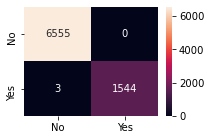

Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2809
           1       0.99      0.83      0.91       569

    accuracy                           0.97      3378
   macro avg       0.98      0.92      0.94      3378
weighted avg       0.97      0.97      0.97      3378



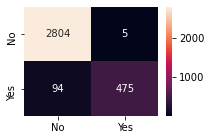

AUC for the Training Data: 1.000
AUC for the Test Data: 0.992


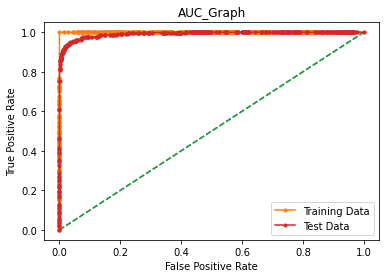

Inference
	 We have a very good  accuracy of 0.971 in test data
	 We have a very good AUC of 0.992 in test data
	 Based on priority of churning
	 Precision  of 1= 0.99, very good value 
	 Recall or sensitivity of 1 = 0.835, medium value 
	 f1 score of 1 = 0.906, good value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem,Transform
0,RF,Train,0,1.000,1.000,1.000,1.000,1.000,True,False,True
1,RF,Train,1,1.000,0.998,0.999,1.000,1.000,True,False,True
2,RF,Test,0,0.968,0.998,0.983,0.971,0.992,True,False,True
3,RF,Test,1,0.990,0.835,0.906,0.971,0.992,True,False,True


In [97]:
## model 4
target='Churn'
data=df_tff.copy()
name='RF'
model_type=RandomForestClassifier(random_state=0,max_depth=15)
sm_rt=round(data[target].value_counts(normalize=True).min(),2)*2
rf4,mrf4=model_analysis(data,target,model_type,Ratio=0.30,print_values=True,Scaled=False,
                   apply_smote=[True,sm_rt],Test=False,Train=False,RA=True,
                   out_rem=False,model_name=name)
rf4['Transform']=True
round(rf4,3)

In [206]:
target='Churn'
data=df_tff.copy()
X1=data.drop(target,axis=1)
frf4=pd.DataFrame({'Variable':X1.columns,
              'Importance':mrf4.feature_importances_}).sort_values('Importance', ascending=False)
display(frf4.head(10))
display(frf4.tail(10))

,Variable,Importance
0,Tenure,0.246608
12,cashback,0.077589
2,CC_Contacted_LY,0.065930
8,Complain_ly,0.063167
11,Day_Since_CC_connect,0.062800
9,rev_growth_yoy,0.055101
6,CC_Agent_Score,0.054375
7,rev_per_month,0.052286
5,Account_user_count,0.034053
10,coupon_used_for_payment,0.030092


,Variable,Importance
15,Payment_Debit Card,0.014378
13,Payment_Cash on Delivery,0.013288
26,Login_device_Computer,0.012751
21,account_segment_Super,0.012052
16,Payment_E wallet,0.011520
18,account_segment_HNI,0.008058
17,Payment_UPI,0.007554
23,Marital_Status_Divorced,0.007332
22,account_segment_Super Plus,0.003662
19,account_segment_Regular,0.002578


In [98]:
rf=pd.concat([rf1,rf2,rf3,rf4],axis=0)
rf.reset_index(inplace=True)
rf.drop(['index'],axis=1,inplace=True)
round(rf,3)

,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem,Transform
0,RF,Train,0,1.000,1.000,1.000,1.000,1.000,False,False,NaN
1,RF,Train,1,1.000,0.998,0.999,1.000,1.000,False,False,NaN
2,RF,Test,0,0.968,0.997,0.982,0.970,0.992,False,False,NaN
3,RF,Test,1,0.981,0.835,0.902,0.970,0.992,False,False,NaN
4,RF,Train,0,1.000,1.000,1.000,1.000,1.000,False,True,NaN
5,RF,Train,1,1.000,0.998,0.999,1.000,1.000,False,True,NaN
6,RF,Test,0,0.970,0.999,0.984,0.973,0.993,False,True,NaN
7,RF,Test,1,0.992,0.847,0.914,0.973,0.993,False,True,NaN
8,RF,Train,0,0.999,1.000,1.000,0.999,1.000,True,True,NaN
9,RF,Train,1,1.000,0.996,0.998,0.999,1.000,True,True,NaN


In [130]:
round(rf[rf['Test/Train']=='Test'],3)

,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem,Transform
2,RF,Test,0,0.968,0.997,0.982,0.970,0.992,False,False,NaN
3,RF,Test,1,0.981,0.835,0.902,0.970,0.992,False,False,NaN
6,RF,Test,0,0.970,0.999,0.984,0.973,0.993,False,True,NaN
7,RF,Test,1,0.992,0.847,0.914,0.973,0.993,False,True,NaN
10,RF,Test,0,0.972,0.998,0.985,0.974,0.993,True,True,NaN
11,RF,Test,1,0.986,0.858,0.917,0.974,0.993,True,True,NaN
14,RF,Test,0,0.968,0.998,0.983,0.971,0.992,True,False,True
15,RF,Test,1,0.990,0.835,0.906,0.971,0.992,True,False,True


In [205]:
target='Churn'
data=df_out.copy()
X1=data.drop(target,axis=1)
frf3=pd.DataFrame({'Variable':X1.columns,
              'Importance':mrf3.feature_importances_}).sort_values('Importance', ascending=False)
display(frf3.head(10))
display(frf3.tail(10))

,Variable,Importance
0,Tenure,0.248680
12,cashback,0.075982
2,CC_Contacted_LY,0.066855
8,Complain_ly,0.063577
11,Day_Since_CC_connect,0.061590
7,rev_per_month,0.054955
9,rev_growth_yoy,0.054076
6,CC_Agent_Score,0.052544
5,Account_user_count,0.037011
20,account_segment_Regular Plus,0.028204


,Variable,Importance
15,Payment_Debit Card,0.014258
26,Login_device_Computer,0.013354
13,Payment_Cash on Delivery,0.013138
21,account_segment_Super,0.011935
16,Payment_E wallet,0.011558
18,account_segment_HNI,0.007789
17,Payment_UPI,0.007781
23,Marital_Status_Divorced,0.007297
22,account_segment_Super Plus,0.003727
19,account_segment_Regular,0.003011


##### Inference
    Based priority of churned customers and test score model 3 with SMOTE and Outliers removed performs best
    •	We have a very good  accuracy of 0.974 in test data
    •	We have a very good AUC of 0.993 in test data
    •	Based on priority of churning
    •	Precision  of 1= 0.986, very good value 
    •	Recall or sensitivity of 1 = 0.858, good value 
    •	f1 score of 1 = 0.917, good value 
    •	Has a very good fit
    •	Data transformation has no positive effect on the model
    •	Tenure has highest feature importance of 0.2248 followed by cashback and CC_Contacted _LY
    •	Account_segment_Regular , Account_segment_Super has the least feature importance


# LDA

Train_score: 0.8695762496828217
Test_score: 0.8718176435760805
Train Data
Counter({0: 6555, 1: 1327})
              precision    recall  f1-score   support

           0       0.88      0.97      0.93      6555
           1       0.72      0.37      0.49      1327

    accuracy                           0.87      7882
   macro avg       0.80      0.67      0.71      7882
weighted avg       0.86      0.87      0.85      7882



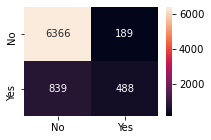

Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.88      0.97      0.93      2809
           1       0.74      0.37      0.49       569

    accuracy                           0.87      3378
   macro avg       0.81      0.67      0.71      3378
weighted avg       0.86      0.87      0.85      3378



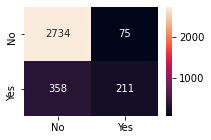

AUC for the Training Data: 0.845
AUC for the Test Data: 0.827


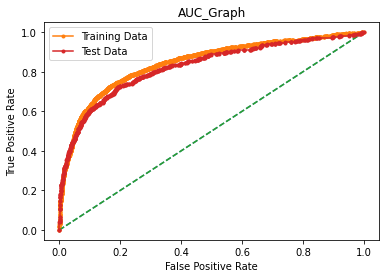

Inference
	 We have a good  accuracy of 0.872 in test data
	 We have a medium AUC of 0.827 in test data
	 Based on priority of churning
	 Precision  of 1= 0.738, bad value 
	 Recall or sensitivity of 1 = 0.371, very bad value 
	 f1 score of 1 = 0.494, very bad value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem
0,lda,Train,0,0.884,0.971,0.925,0.870,0.845,False,False
1,lda,Train,1,0.721,0.368,0.487,0.870,0.845,False,False
2,lda,Test,0,0.884,0.973,0.927,0.872,0.827,False,False
3,lda,Test,1,0.738,0.371,0.494,0.872,0.827,False,False


In [76]:
## lda model 1

target='Churn'
data=df_tf.copy()
name='lda'
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
model_type=LDA()

lda1,mlda1=model_analysis(data,target,model_type,Ratio=0.30,print_values=True,Scaled=True,
                   apply_smote=[False,0.30],Test=False,Train=False,RA=True,
                   out_rem=False,model_name=name)
round(lda1,3)

In [228]:

flda1=pd.DataFrame({'Variable':list(mlda1.feature_names_in_),
              'Importance':list(mlda1.coef_[0])}).sort_values('Importance', ascending=False)
display(flda1.head(10))
display(flda1.tail(10))

,Variable,Importance
8,Complain_ly,0.817569
6,CC_Agent_Score,0.401646
20,account_segment_Regular Plus,0.388203
1,City_Tier,0.372631
5,Account_user_count,0.353707
25,Marital_Status_Single,0.331132
2,CC_Contacted_LY,0.283094
13,Payment_Cash on Delivery,0.166045
7,rev_per_month,0.119329
10,coupon_used_for_payment,0.117034


,Variable,Importance
4,Service_Score,-0.075283
27,Login_device_Mobile,-0.095395
22,account_segment_Super Plus,-0.104168
14,Payment_Credit Card,-0.109993
3,Gender,-0.115868
23,Marital_Status_Divorced,-0.119944
24,Marital_Status_Married,-0.218224
11,Day_Since_CC_connect,-0.291755
21,account_segment_Super,-0.318303
0,Tenure,-0.648873


Train_score: 0.8864501395584877
Test_score: 0.8878034339846063
Train Data
Counter({0: 6555, 1: 1327})
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6555
           1       0.76      0.47      0.58      1327

    accuracy                           0.89      7882
   macro avg       0.83      0.72      0.76      7882
weighted avg       0.88      0.89      0.88      7882



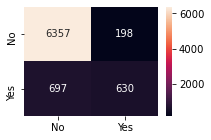

Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2809
           1       0.78      0.47      0.58       569

    accuracy                           0.89      3378
   macro avg       0.84      0.72      0.76      3378
weighted avg       0.88      0.89      0.88      3378



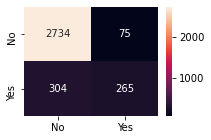

AUC for the Training Data: 0.879
AUC for the Test Data: 0.859


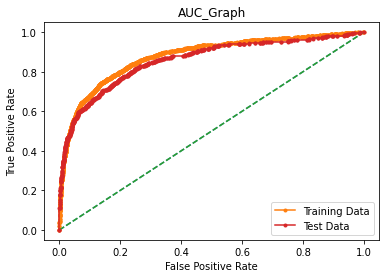

Inference
	 We have a good  accuracy of 0.888 in test data
	 We have a good AUC of 0.859 in test data
	 Based on priority of churning
	 Precision  of 1= 0.779, medium value 
	 Recall or sensitivity of 1 = 0.466, very bad value 
	 f1 score of 1 = 0.583, very bad value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem
0,lda,Train,0,0.901,0.970,0.934,0.886,0.879,False,True
1,lda,Train,1,0.761,0.475,0.585,0.886,0.879,False,True
2,lda,Test,0,0.900,0.973,0.935,0.888,0.859,False,True
3,lda,Test,1,0.779,0.466,0.583,0.888,0.859,False,True


In [77]:
## lda model 2

target='Churn'
data=df_out.copy()
name='lda'
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
model_type=LDA()

lda2,mlda2=model_analysis(data,target,model_type,Ratio=0.30,print_values=True,Scaled=True,
                   apply_smote=[False,0.30],Test=False,Train=False,RA=True,
                   out_rem=True,model_name=name)
round(lda2,3)

In [229]:
flda2=pd.DataFrame({'Variable':list(mlda2.feature_names_in_),
              'Importance':list(mlda2.coef_[0])}).sort_values('Importance', ascending=False)
display(flda2.head(10))
display(flda2.tail(10))

,Variable,Importance
8,Complain_ly,0.863900
7,rev_per_month,0.404117
6,CC_Agent_Score,0.388719
5,Account_user_count,0.372061
1,City_Tier,0.343329
25,Marital_Status_Single,0.320499
2,CC_Contacted_LY,0.288637
19,account_segment_Regular,0.266114
22,account_segment_Super Plus,0.198098
13,Payment_Cash on Delivery,0.181020


,Variable,Importance
9,rev_growth_yoy,-0.066065
27,Login_device_Mobile,-0.097643
23,Marital_Status_Divorced,-0.106085
3,Gender,-0.116980
14,Payment_Credit Card,-0.122132
24,Marital_Status_Married,-0.218334
11,Day_Since_CC_connect,-0.257834
12,cashback,-0.334006
21,account_segment_Super,-0.431416
0,Tenure,-1.148443


Train_score: 0.8791208791208791
Test_score: 0.8860272350503257
Train Data
Counter({0: 6555, 1: 1544})
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6555
           1       0.78      0.51      0.62      1544

    accuracy                           0.88      8099
   macro avg       0.84      0.74      0.77      8099
weighted avg       0.87      0.88      0.87      8099



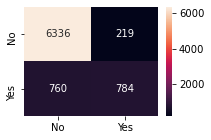

Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2809
           1       0.77      0.46      0.58       569

    accuracy                           0.89      3378
   macro avg       0.83      0.72      0.76      3378
weighted avg       0.88      0.89      0.87      3378



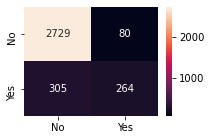

AUC for the Training Data: 0.884
AUC for the Test Data: 0.858


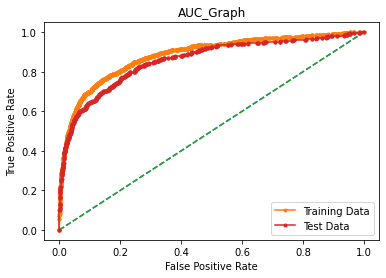

Inference
	 We have a good  accuracy of 0.886 in test data
	 We have a good AUC of 0.858 in test data
	 Based on priority of churning
	 Precision  of 1= 0.767, medium value 
	 Recall or sensitivity of 1 = 0.464, very bad value 
	 f1 score of 1 = 0.578, very bad value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem
0,lda,Train,0,0.893,0.967,0.928,0.879,0.884,True,True
1,lda,Train,1,0.782,0.508,0.616,0.879,0.884,True,True
2,lda,Test,0,0.899,0.972,0.934,0.886,0.858,True,True
3,lda,Test,1,0.767,0.464,0.578,0.886,0.858,True,True


In [78]:
## lda model 3

target='Churn'
data=df_out.copy()
name='lda'
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
model_type=LDA()
sm_rt=round(data[target].value_counts(normalize=True).min(),2)*2
lda3,mlda3=model_analysis(data,target,model_type,Ratio=0.30,print_values=True,Scaled=False,
                   apply_smote=[True,sm_rt],Test=False,Train=False,RA=True,
                   out_rem=True,model_name=name)
round(lda3,3)

In [230]:
flda3=pd.DataFrame({'Variable':list(mlda3.feature_names_in_),
              'Importance':list(mlda3.coef_[0])}).sort_values('Importance', ascending=False)
display(flda3.head(10))
display(flda3.tail(10))

,Variable,Importance
8,Complain_ly,1.889577
5,Account_user_count,0.404394
13,Payment_Cash on Delivery,0.389281
1,City_Tier,0.385542
6,CC_Agent_Score,0.277771
7,rev_per_month,0.136699
16,Payment_E wallet,0.117401
10,coupon_used_for_payment,0.075302
2,CC_Contacted_LY,0.035188
12,cashback,-0.008093


,Variable,Importance
14,Payment_Credit Card,-0.493680
22,account_segment_Super Plus,-0.757299
18,account_segment_HNI,-1.299409
20,account_segment_Regular Plus,-1.300582
21,account_segment_Super,-2.505659
26,Login_device_Computer,-3.613944
27,Login_device_Mobile,-4.050534
25,Marital_Status_Single,-4.255836
23,Marital_Status_Divorced,-5.370976
24,Marital_Status_Married,-5.439344


Train_score: 0.8695762496828217
Test_score: 0.8718176435760805
Train Data
Counter({0: 6555, 1: 1327})
              precision    recall  f1-score   support

           0       0.88      0.97      0.93      6555
           1       0.72      0.37      0.49      1327

    accuracy                           0.87      7882
   macro avg       0.80      0.67      0.71      7882
weighted avg       0.86      0.87      0.85      7882



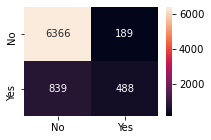

Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.88      0.97      0.93      2809
           1       0.74      0.37      0.49       569

    accuracy                           0.87      3378
   macro avg       0.81      0.67      0.71      3378
weighted avg       0.86      0.87      0.85      3378



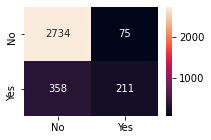

AUC for the Training Data: 0.845
AUC for the Test Data: 0.827


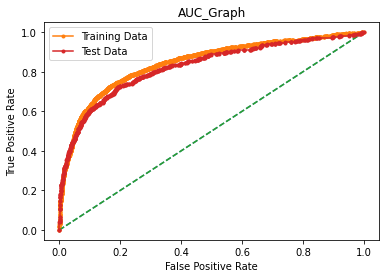

Inference
	 We have a good  accuracy of 0.872 in test data
	 We have a medium AUC of 0.827 in test data
	 Based on priority of churning
	 Precision  of 1= 0.738, bad value 
	 Recall or sensitivity of 1 = 0.371, very bad value 
	 f1 score of 1 = 0.494, very bad value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem,Transform
0,lda,Train,0,0.884,0.971,0.925,0.870,0.845,False,False,True
1,lda,Train,1,0.721,0.368,0.487,0.870,0.845,False,False,True
2,lda,Test,0,0.884,0.973,0.927,0.872,0.827,False,False,True
3,lda,Test,1,0.738,0.371,0.494,0.872,0.827,False,False,True


In [94]:

## lda model 4

target='Churn'
data=df_tff.copy()
name='lda'
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
model_type=LDA()
sm_rt=round(data[target].value_counts(normalize=True).min(),2)*2
lda4,mlda4=model_analysis(data,target,model_type,Ratio=0.30,print_values=True,Scaled=False,
                   apply_smote=[False,sm_rt],Test=False,Train=False,RA=True,
                   out_rem=False,model_name=name)
lda4['Transform']=True
round(lda4,3)

In [231]:
flda4=pd.DataFrame({'Variable':list(mlda4.feature_names_in_),
              'Importance':list(mlda4.coef_[0])}).sort_values('Importance', ascending=False)
display(flda4.head(10))
display(flda4.tail(10))

,Variable,Importance
8,Complain_ly,1.828355
20,account_segment_Regular Plus,0.801926
25,Marital_Status_Single,0.714328
13,Payment_Cash on Delivery,0.580055
1,City_Tier,0.408264
5,Account_user_count,0.352179
6,CC_Agent_Score,0.292617
16,Payment_E wallet,0.280237
26,Login_device_Computer,0.215372
10,coupon_used_for_payment,0.059431


,Variable,Importance
11,Day_Since_CC_connect,-0.079944
15,Payment_Debit Card,-0.095600
4,Service_Score,-0.104207
27,Login_device_Mobile,-0.215372
3,Gender,-0.237019
14,Payment_Credit Card,-0.237445
23,Marital_Status_Divorced,-0.337647
22,account_segment_Super Plus,-0.401331
24,Marital_Status_Married,-0.437799
21,account_segment_Super,-0.662831


In [232]:
lda=pd.concat([lda1,lda2,lda3,lda4],axis=0)
lda.reset_index(inplace=True)
lda.drop(['index'],axis=1,inplace=True)
round(lda,3)

,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem,Transform
0,lda,Train,0,0.884,0.971,0.925,0.870,0.845,False,False,NaN
1,lda,Train,1,0.721,0.368,0.487,0.870,0.845,False,False,NaN
2,lda,Test,0,0.884,0.973,0.927,0.872,0.827,False,False,NaN
3,lda,Test,1,0.738,0.371,0.494,0.872,0.827,False,False,NaN
4,lda,Train,0,0.901,0.970,0.934,0.886,0.879,False,True,NaN
5,lda,Train,1,0.761,0.475,0.585,0.886,0.879,False,True,NaN
6,lda,Test,0,0.900,0.973,0.935,0.888,0.859,False,True,NaN
7,lda,Test,1,0.779,0.466,0.583,0.888,0.859,False,True,NaN
8,lda,Train,0,0.893,0.967,0.928,0.879,0.884,True,True,NaN
9,lda,Train,1,0.782,0.508,0.616,0.879,0.884,True,True,NaN


In [233]:
round(lda[lda['Test/Train']=='Test'],3)

,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem,Transform
2,lda,Test,0,0.884,0.973,0.927,0.872,0.827,False,False,NaN
3,lda,Test,1,0.738,0.371,0.494,0.872,0.827,False,False,NaN
6,lda,Test,0,0.900,0.973,0.935,0.888,0.859,False,True,NaN
7,lda,Test,1,0.779,0.466,0.583,0.888,0.859,False,True,NaN
10,lda,Test,0,0.899,0.972,0.934,0.886,0.858,True,True,NaN
11,lda,Test,1,0.767,0.464,0.578,0.886,0.858,True,True,NaN
14,lda,Test,0,0.884,0.973,0.927,0.872,0.827,False,False,True
15,lda,Test,1,0.738,0.371,0.494,0.872,0.827,False,False,True


In [229]:
flda2=pd.DataFrame({'Variable':list(mlda2.feature_names_in_),
              'Importance':list(mlda2.coef_[0])}).sort_values('Importance', ascending=False)
display(flda2.head(10))
display(flda2.tail(10))

,Variable,Importance
8,Complain_ly,0.863900
7,rev_per_month,0.404117
6,CC_Agent_Score,0.388719
5,Account_user_count,0.372061
1,City_Tier,0.343329
25,Marital_Status_Single,0.320499
2,CC_Contacted_LY,0.288637
19,account_segment_Regular,0.266114
22,account_segment_Super Plus,0.198098
13,Payment_Cash on Delivery,0.181020


,Variable,Importance
9,rev_growth_yoy,-0.066065
27,Login_device_Mobile,-0.097643
23,Marital_Status_Divorced,-0.106085
3,Gender,-0.116980
14,Payment_Credit Card,-0.122132
24,Marital_Status_Married,-0.218334
11,Day_Since_CC_connect,-0.257834
12,cashback,-0.334006
21,account_segment_Super,-0.431416
0,Tenure,-1.148443


##### Inference
    Based priority of churned customers and test score model 2 with no SMOTE and Outliers removed performs best
    •	We have a good  accuracy of 0.888 in test data
    •	We have a good AUC of 0.859 in test data
    •	Based on priority of churning
    •	Precision  of 1= 0.779, medium value 
    •	Recall or sensitivity of 1 = 0.466, very bad value 
    •	f1 score of 1 = 0.583, very bad value 
    •	train accuracy slightly  less than test accuracy  
    •	Complain_LY has the highest positive coefficient of 0.86 followed by rev_per_month at 0.4
    •	Tenure has the most negative coefficient of -1.14 followed by account_segment_super at -0.43
    •	Data transformation has no positive effect on the model


# SVM

Train_score: 0.9407510784064959
Test_score: 0.9253996447602132
Train Data
Counter({0: 6555, 1: 1327})
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      6555
           1       0.94      0.69      0.80      1327

    accuracy                           0.94      7882
   macro avg       0.94      0.84      0.88      7882
weighted avg       0.94      0.94      0.94      7882



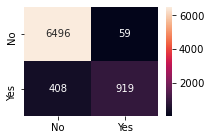

Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2809
           1       0.92      0.61      0.73       569

    accuracy                           0.93      3378
   macro avg       0.92      0.80      0.84      3378
weighted avg       0.93      0.93      0.92      3378



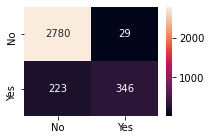

Inference
	 We have a good  accuracy of 0.925 in test data
	 We have a very bad AUC of nan in test data
	 Based on priority of churning
	 Precision  of 1= 0.923, good value 
	 Recall or sensitivity of 1 = 0.608, very bad value 
	 f1 score of 1 = 0.733, bad value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem
0,svm,Train,0,0.941,0.991,0.965,0.941,NaN,False,False
1,svm,Train,1,0.940,0.693,0.797,0.941,NaN,False,False
2,svm,Test,0,0.926,0.990,0.957,0.925,NaN,False,False
3,svm,Test,1,0.923,0.608,0.733,0.925,NaN,False,False


In [84]:
## svm model 1

target='Churn'
data=df_tf.copy()
name='svm'
model_type=SVC(random_state=0)

svm1,msvm1=model_analysis(data,target,model_type,Ratio=0.30,print_values=True,Scaled=True,
                   apply_smote=[False,0.30],Test=False,Train=False,RA=False,
                   out_rem=False,model_name=name)
round(svm1,3)

Train_score: 0.9462065465617864
Test_score: 0.9328004736530492
Train Data
Counter({0: 6555, 1: 1327})
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6555
           1       0.94      0.72      0.82      1327

    accuracy                           0.95      7882
   macro avg       0.95      0.86      0.89      7882
weighted avg       0.95      0.95      0.94      7882



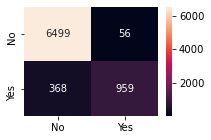

Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2809
           1       0.93      0.65      0.77       569

    accuracy                           0.93      3378
   macro avg       0.93      0.82      0.86      3378
weighted avg       0.93      0.93      0.93      3378



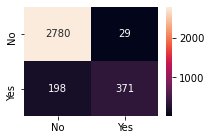

Inference
	 We have a good  accuracy of 0.933 in test data
	 We have a very bad AUC of nan in test data
	 Based on priority of churning
	 Precision  of 1= 0.927, good value 
	 Recall or sensitivity of 1 = 0.652, bad value 
	 f1 score of 1 = 0.766, medium value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem
0,svm,Train,0,0.946,0.991,0.968,0.946,NaN,False,True
1,svm,Train,1,0.945,0.723,0.819,0.946,NaN,False,True
2,svm,Test,0,0.934,0.990,0.961,0.933,NaN,False,True
3,svm,Test,1,0.928,0.652,0.766,0.933,NaN,False,True


In [85]:
## svm model 2

target='Churn'
data=df_out.copy()
name='svm'
model_type=SVC(random_state=0)

svm2,msvm2=model_analysis(data,target,model_type,Ratio=0.30,print_values=True,Scaled=True,
                   apply_smote=[False,0.30],Test=False,Train=False,RA=False,
                   out_rem=True,model_name=name)
round(svm2,3)

Train_score: 0.9497893658203347
Test_score: 0.9366489046773239
Train Data
Counter({0: 6555, 1: 2228})
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      6555
           1       0.93      0.86      0.90      2228

    accuracy                           0.95      8783
   macro avg       0.94      0.92      0.93      8783
weighted avg       0.95      0.95      0.95      8783



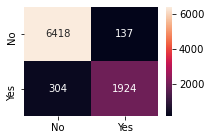

Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2809
           1       0.85      0.75      0.80       569

    accuracy                           0.94      3378
   macro avg       0.90      0.86      0.88      3378
weighted avg       0.93      0.94      0.94      3378



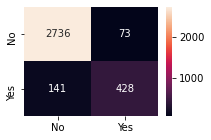

Inference
	 We have a good  accuracy of 0.937 in test data
	 We have a very bad AUC of nan in test data
	 Based on priority of churning
	 Precision  of 1= 0.854, good value 
	 Recall or sensitivity of 1 = 0.752, medium value 
	 f1 score of 1 = 0.8, medium value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem
0,svm,Train,0,0.955,0.979,0.967,0.950,NaN,True,True
1,svm,Train,1,0.934,0.864,0.897,0.950,NaN,True,True
2,svm,Test,0,0.951,0.974,0.962,0.937,NaN,True,True
3,svm,Test,1,0.854,0.752,0.800,0.937,NaN,True,True


In [102]:
## svm model 3

target='Churn'
data=df_out.copy()
name='svm'
model_type=SVC(random_state=0)
sm_rt=round(data[target].value_counts(normalize=True).min(),2)*2
svm3,msvm3=model_analysis(data,target,model_type,Ratio=0.30,print_values=True,Scaled=True,
                   apply_smote=[True,sm_rt],Test=False,Train=False,RA=False,
                   out_rem=True,model_name=name)
round(svm3,3)

Train_score: 0.9497893658203347
Test_score: 0.9366489046773239
Train Data
Counter({0: 6555, 1: 2228})
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      6555
           1       0.93      0.86      0.90      2228

    accuracy                           0.95      8783
   macro avg       0.94      0.92      0.93      8783
weighted avg       0.95      0.95      0.95      8783



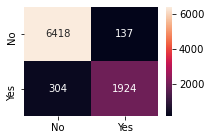

Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2809
           1       0.85      0.75      0.80       569

    accuracy                           0.94      3378
   macro avg       0.90      0.86      0.88      3378
weighted avg       0.93      0.94      0.94      3378



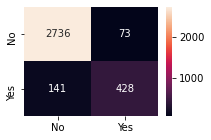

Inference
	 We have a good  accuracy of 0.937 in test data
	 We have a very bad AUC of nan in test data
	 Based on priority of churning
	 Precision  of 1= 0.854, good value 
	 Recall or sensitivity of 1 = 0.752, medium value 
	 f1 score of 1 = 0.8, medium value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem,Transform
0,svm,Train,0,0.955,0.979,0.967,0.950,NaN,True,True,True
1,svm,Train,1,0.934,0.864,0.897,0.950,NaN,True,True,True
2,svm,Test,0,0.951,0.974,0.962,0.937,NaN,True,True,True
3,svm,Test,1,0.854,0.752,0.800,0.937,NaN,True,True,True


In [103]:
## svm model 4

target='Churn'
data=df_out0.copy()
name='svm'
model_type=SVC(random_state=0)
sm_rt=round(data[target].value_counts(normalize=True).min(),2)*2
svm4,msvm4=model_analysis(data,target,model_type,Ratio=0.30,print_values=True,Scaled=True,
                   apply_smote=[True,sm_rt],Test=False,Train=False,RA=False,
                   out_rem=True,model_name=name)
svm4['Transform']=True
round(svm4,3)


In [104]:
svm=pd.concat([svm1,svm2,svm3,svm4],axis=0)
svm.reset_index(inplace=True)
svm.drop(['index'],axis=1,inplace=True)
svm

,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem,Transform
0,svm,Train,0,0.940904,0.990999,0.965302,0.940751,NaN,False,False,NaN
1,svm,Train,1,0.939673,0.692540,0.797397,0.940751,NaN,False,False,NaN
2,svm,Test,0,0.925741,0.989676,0.956641,0.925400,NaN,False,False,NaN
3,svm,Test,1,0.922667,0.608084,0.733051,0.925400,NaN,False,False,NaN
4,svm,Train,0,0.946410,0.991457,0.968410,0.946207,NaN,False,True,NaN
5,svm,Train,1,0.944828,0.722683,0.818958,0.946207,NaN,False,True,NaN
6,svm,Test,0,0.933512,0.989676,0.960774,0.932800,NaN,False,True,NaN
7,svm,Test,1,0.927500,0.652021,0.765738,0.932800,NaN,False,True,NaN
8,svm,Train,0,0.954775,0.979100,0.966785,0.949789,NaN,True,True,NaN
9,svm,Train,1,0.933527,0.863555,0.897179,0.949789,NaN,True,True,NaN


In [132]:
round(svm[svm['Test/Train']=='Test'],3)

,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem,Transform
2,svm,Test,0,0.926,0.990,0.957,0.925,NaN,False,False,NaN
3,svm,Test,1,0.923,0.608,0.733,0.925,NaN,False,False,NaN
6,svm,Test,0,0.934,0.990,0.961,0.933,NaN,False,True,NaN
7,svm,Test,1,0.928,0.652,0.766,0.933,NaN,False,True,NaN
10,svm,Test,0,0.951,0.974,0.962,0.937,NaN,True,True,NaN
11,svm,Test,1,0.854,0.752,0.800,0.937,NaN,True,True,NaN
14,svm,Test,0,0.951,0.974,0.962,0.937,NaN,True,True,True
15,svm,Test,1,0.854,0.752,0.800,0.937,NaN,True,True,True


# Naive Bayes

Train_score: 0.7926922100989596
Test_score: 0.7895204262877442
Train Data
Counter({0: 6555, 1: 1327})
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      6555
           1       0.43      0.66      0.52      1327

    accuracy                           0.79      7882
   macro avg       0.67      0.74      0.69      7882
weighted avg       0.84      0.79      0.81      7882



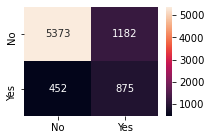

Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      2809
           1       0.42      0.64      0.51       569

    accuracy                           0.79      3378
   macro avg       0.67      0.73      0.69      3378
weighted avg       0.83      0.79      0.81      3378



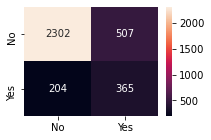

AUC for the Training Data: 0.793
AUC for the Test Data: 0.774


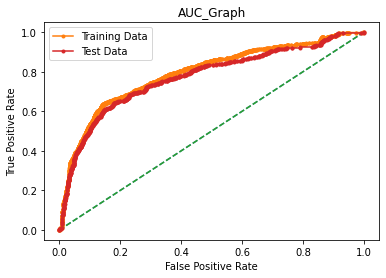

Inference
	 We have a medium  accuracy of 0.79 in test data
	 We have a medium AUC of 0.774 in test data
	 Based on priority of churning
	 Precision  of 1= 0.419, very bad value 
	 Recall or sensitivity of 1 = 0.641, very bad value 
	 f1 score of 1 = 0.507, very bad value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem
0,nb,Train,0,0.922,0.820,0.868,0.793,0.793,False,False
1,nb,Train,1,0.425,0.659,0.517,0.793,0.793,False,False
2,nb,Test,0,0.919,0.820,0.866,0.790,0.774,False,False
3,nb,Test,1,0.419,0.641,0.507,0.790,0.774,False,False


In [105]:
## nb model 1

target='Churn'
data=df_tf.copy()
name='nb'
model_type=GaussianNB()

nb1,mnb1=model_analysis(data,target,model_type,Ratio=0.30,print_values=True,Scaled=True,
                   apply_smote=[False,0.30],Test=False,Train=False,RA=True,
                   out_rem=False,model_name=name)
round(nb1,3)

Train_score: 0.7696016239533113
Test_score: 0.7646536412078153
Train Data
Counter({0: 6555, 1: 1327})
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      6555
           1       0.40      0.72      0.51      1327

    accuracy                           0.77      7882
   macro avg       0.66      0.75      0.68      7882
weighted avg       0.84      0.77      0.79      7882



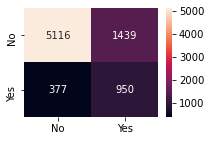

Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      2809
           1       0.39      0.71      0.50       569

    accuracy                           0.76      3378
   macro avg       0.66      0.74      0.67      3378
weighted avg       0.84      0.76      0.79      3378



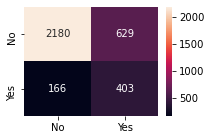

AUC for the Training Data: 0.813
AUC for the Test Data: 0.793


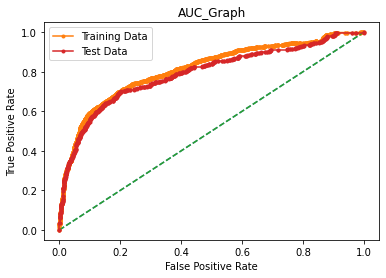

Inference
	 We have a medium  accuracy of 0.765 in test data
	 We have a medium AUC of 0.793 in test data
	 Based on priority of churning
	 Precision  of 1= 0.391, very bad value 
	 Recall or sensitivity of 1 = 0.708, bad value 
	 f1 score of 1 = 0.503, very bad value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem
0,nb,Train,0,0.931,0.780,0.849,0.770,0.813,False,True
1,nb,Train,1,0.398,0.716,0.511,0.770,0.813,False,True
2,nb,Test,0,0.929,0.776,0.846,0.765,0.793,False,True
3,nb,Test,1,0.391,0.708,0.503,0.765,0.793,False,True


In [106]:
## nb model 2

target='Churn'
data=df_out.copy()
name='nb'
model_type=GaussianNB()

nb2,mnb2=model_analysis(data,target,model_type,Ratio=0.30,print_values=True,Scaled=True,
                   apply_smote=[False,0.30],Test=False,Train=False,RA=True,
                   out_rem=True,model_name=name)
round(nb2,3)

Train_score: 0.7340316520551065
Test_score: 0.7220248667850799
Train Data
Counter({0: 6555, 1: 2228})
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      6555
           1       0.48      0.75      0.59      2228

    accuracy                           0.73      8783
   macro avg       0.69      0.74      0.70      8783
weighted avg       0.79      0.73      0.75      8783



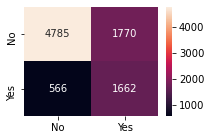

Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.93      0.72      0.81      2809
           1       0.35      0.73      0.47       569

    accuracy                           0.72      3378
   macro avg       0.64      0.72      0.64      3378
weighted avg       0.83      0.72      0.75      3378



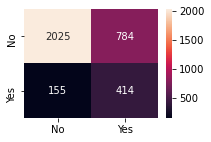

AUC for the Training Data: 0.809
AUC for the Test Data: 0.791


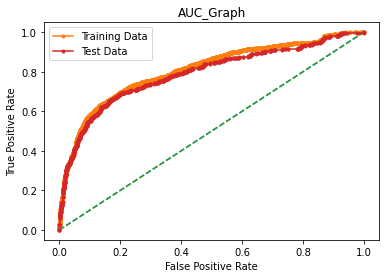

Inference
	 We have a bad  accuracy of 0.722 in test data
	 We have a medium AUC of 0.791 in test data
	 Based on priority of churning
	 Precision  of 1= 0.346, very bad value 
	 Recall or sensitivity of 1 = 0.728, bad value 
	 f1 score of 1 = 0.469, very bad value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem
0,nb,Train,0,0.894,0.730,0.804,0.734,0.809,True,True
1,nb,Train,1,0.484,0.746,0.587,0.734,0.809,True,True
2,nb,Test,0,0.929,0.721,0.812,0.722,0.791,True,True
3,nb,Test,1,0.346,0.728,0.469,0.722,0.791,True,True


In [107]:
## nb model 3

target='Churn'
data=df_out.copy()
name='nb'
model_type=GaussianNB()
sm_rt=round(data[target].value_counts(normalize=True).min(),2)*2
nb3,mnb3=model_analysis(data,target,model_type,Ratio=0.30,print_values=True,Scaled=True,
                   apply_smote=[True,sm_rt],Test=False,Train=False,RA=True,
                   out_rem=True,model_name=name)
round(nb3,3)

Train_score: 0.7926922100989596
Test_score: 0.7895204262877442
Train Data
Counter({0: 6555, 1: 1327})
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      6555
           1       0.43      0.66      0.52      1327

    accuracy                           0.79      7882
   macro avg       0.67      0.74      0.69      7882
weighted avg       0.84      0.79      0.81      7882



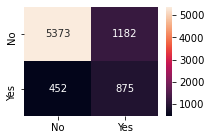

Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      2809
           1       0.42      0.64      0.51       569

    accuracy                           0.79      3378
   macro avg       0.67      0.73      0.69      3378
weighted avg       0.83      0.79      0.81      3378



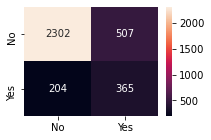

AUC for the Training Data: 0.793
AUC for the Test Data: 0.774


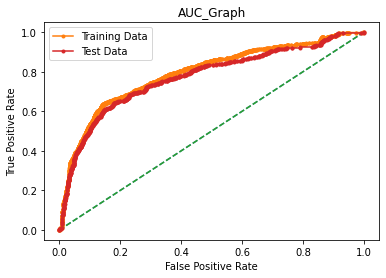

Inference
	 We have a medium  accuracy of 0.79 in test data
	 We have a medium AUC of 0.774 in test data
	 Based on priority of churning
	 Precision  of 1= 0.419, very bad value 
	 Recall or sensitivity of 1 = 0.641, very bad value 
	 f1 score of 1 = 0.507, very bad value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem,Transform
0,nb,Train,0,0.922,0.820,0.868,0.793,0.793,False,False,True
1,nb,Train,1,0.425,0.659,0.517,0.793,0.793,False,False,True
2,nb,Test,0,0.919,0.820,0.866,0.790,0.774,False,False,True
3,nb,Test,1,0.419,0.641,0.507,0.790,0.774,False,False,True


In [112]:
## nb model 4

target='Churn'
data=df_tff.copy()
name='nb'
model_type=GaussianNB()
sm_rt=round(data[target].value_counts(normalize=True).min(),2)*2
nb4,mnb4=model_analysis(data,target,model_type,Ratio=0.30,print_values=True,Scaled=True,
                   apply_smote=[False,sm_rt],Test=False,Train=False,RA=True,
                   out_rem=False,model_name=name)
nb4['Transform']=True
round(nb4,3)


In [113]:
nb=pd.concat([nb1,nb2,nb3,nb4],axis=0)
nb.reset_index(inplace=True)
nb.drop(['index'],axis=1,inplace=True)
nb

,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem,Transform
0,nb,Train,0,0.922403,0.819680,0.868013,0.792692,0.793183,False,False,NaN
1,nb,Train,1,0.425377,0.659382,0.517139,0.792692,0.793183,False,False,NaN
2,nb,Test,0,0.918595,0.819509,0.866228,0.789520,0.774371,False,False,NaN
3,nb,Test,1,0.418578,0.641476,0.506593,0.789520,0.774371,False,False,NaN
4,nb,Train,0,0.931367,0.780473,0.849270,0.769602,0.813327,False,True,NaN
5,nb,Train,1,0.397656,0.715901,0.511302,0.769602,0.813327,False,True,NaN
6,nb,Test,0,0.929241,0.776077,0.845781,0.764654,0.792829,False,True,NaN
7,nb,Test,1,0.390504,0.708260,0.503435,0.764654,0.792829,False,True,NaN
8,nb,Train,0,0.894225,0.729977,0.803796,0.734032,0.809227,True,True,NaN
9,nb,Train,1,0.484266,0.745961,0.587279,0.734032,0.809227,True,True,NaN


In [133]:
round(nb[nb['Test/Train']=='Test'],3)

,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem,Transform
2,nb,Test,0,0.919,0.820,0.866,0.790,0.774,False,False,NaN
3,nb,Test,1,0.419,0.641,0.507,0.790,0.774,False,False,NaN
6,nb,Test,0,0.929,0.776,0.846,0.765,0.793,False,True,NaN
7,nb,Test,1,0.391,0.708,0.503,0.765,0.793,False,True,NaN
10,nb,Test,0,0.929,0.721,0.812,0.722,0.791,True,True,NaN
11,nb,Test,1,0.346,0.728,0.469,0.722,0.791,True,True,NaN
14,nb,Test,0,0.919,0.820,0.866,0.790,0.774,False,False,True
15,nb,Test,1,0.419,0.641,0.507,0.790,0.774,False,False,True


# KNN

Train_score: 0.9727226592235473
Test_score: 0.9372409709887507
Train Data
Counter({0: 6555, 1: 1327})
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6555
           1       0.95      0.88      0.92      1327

    accuracy                           0.97      7882
   macro avg       0.96      0.94      0.95      7882
weighted avg       0.97      0.97      0.97      7882



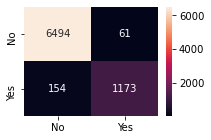

Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2809
           1       0.86      0.75      0.80       569

    accuracy                           0.94      3378
   macro avg       0.90      0.86      0.88      3378
weighted avg       0.94      0.94      0.94      3378



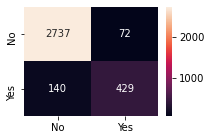

AUC for the Training Data: 0.994
AUC for the Test Data: 0.960


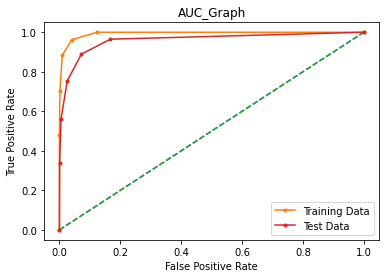

Inference
	 We have a good  accuracy of 0.937 in test data
	 We have a very good AUC of 0.96 in test data
	 Based on priority of churning
	 Precision  of 1= 0.856, good value 
	 Recall or sensitivity of 1 = 0.754, medium value 
	 f1 score of 1 = 0.802, medium value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem
0,knn,Train,0,0.977,0.991,0.984,0.973,0.994,False,False
1,knn,Train,1,0.951,0.884,0.916,0.973,0.994,False,False
2,knn,Test,0,0.951,0.974,0.963,0.937,0.960,False,False
3,knn,Test,1,0.856,0.754,0.802,0.937,0.960,False,False


In [114]:
## knn model 1

target='Churn'
data=df_tf.copy()
name='knn'
model_type=KNeighborsClassifier(n_jobs=-1)
knn1,mknn1=model_analysis(data,target,model_type,Ratio=0.30,print_values=True,Scaled=True,
                   apply_smote=[False,0.30],Test=False,Train=False,RA=True,
                   out_rem=False,model_name=name)
round(knn1,3)

Train_score: 0.9772900279116975
Test_score: 0.9484902309058615
Train Data
Counter({0: 6555, 1: 1327})
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6555
           1       0.96      0.91      0.93      1327

    accuracy                           0.98      7882
   macro avg       0.97      0.95      0.96      7882
weighted avg       0.98      0.98      0.98      7882



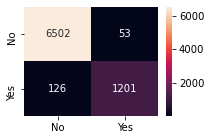

Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2809
           1       0.89      0.79      0.84       569

    accuracy                           0.95      3378
   macro avg       0.92      0.89      0.90      3378
weighted avg       0.95      0.95      0.95      3378



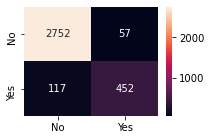

AUC for the Training Data: 0.996
AUC for the Test Data: 0.969


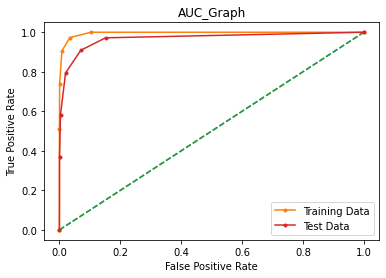

Inference
	 We have a good  accuracy of 0.948 in test data
	 We have a very good AUC of 0.969 in test data
	 Based on priority of churning
	 Precision  of 1= 0.888, good value 
	 Recall or sensitivity of 1 = 0.794, medium value 
	 f1 score of 1 = 0.839, medium value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem
0,knn,Train,0,0.981,0.992,0.986,0.977,0.996,False,True
1,knn,Train,1,0.958,0.905,0.931,0.977,0.996,False,True
2,knn,Test,0,0.959,0.980,0.969,0.948,0.969,False,True
3,knn,Test,1,0.888,0.794,0.839,0.948,0.969,False,True


In [115]:
## knn model 2

target='Churn'
data=df_out.copy()
name='knn'
model_type=KNeighborsClassifier(n_jobs=-1)

knn2,mknn2=model_analysis(data,target,model_type,Ratio=0.30,print_values=True,Scaled=True,
                   apply_smote=[False,0.30],Test=False,Train=False,RA=True,
                   out_rem=True,model_name=name)
round(knn2,3)

Train_score: 0.9805305704201298
Test_score: 0.9464179988158674
Train Data
Counter({0: 6555, 1: 2228})
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      6555
           1       0.95      0.97      0.96      2228

    accuracy                           0.98      8783
   macro avg       0.97      0.98      0.97      8783
weighted avg       0.98      0.98      0.98      8783



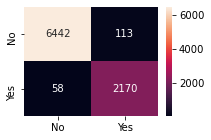

Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2809
           1       0.82      0.88      0.85       569

    accuracy                           0.95      3378
   macro avg       0.90      0.92      0.91      3378
weighted avg       0.95      0.95      0.95      3378



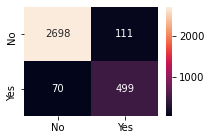

AUC for the Training Data: 0.998
AUC for the Test Data: 0.972


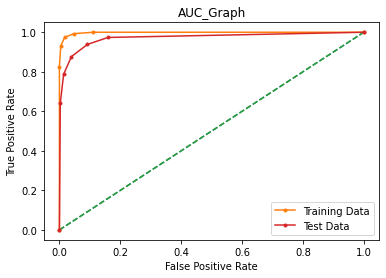

Inference
	 We have a good  accuracy of 0.946 in test data
	 We have a very good AUC of 0.972 in test data
	 Based on priority of churning
	 Precision  of 1= 0.818, medium value 
	 Recall or sensitivity of 1 = 0.877, good value 
	 f1 score of 1 = 0.846, medium value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem
0,knn,Train,0,0.991,0.983,0.987,0.981,0.998,True,True
1,knn,Train,1,0.951,0.974,0.962,0.981,0.998,True,True
2,knn,Test,0,0.975,0.960,0.968,0.946,0.972,True,True
3,knn,Test,1,0.818,0.877,0.846,0.946,0.972,True,True


In [116]:
## knn model 3

target='Churn'
data=df_out.copy()
name='knn'
model_type=KNeighborsClassifier(n_jobs=-1)
sm_rt=round(data[target].value_counts(normalize=True).min(),2)*2
knn3,mknn3=model_analysis(data,target,model_type,Ratio=0.30,print_values=True,Scaled=True,
                   apply_smote=[True,sm_rt],Test=False,Train=False,RA=True,
                   out_rem=True,model_name=name)
round(knn3,3)


Train_score: 0.9805305704201298
Test_score: 0.9464179988158674
Train Data
Counter({0: 6555, 1: 2228})
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      6555
           1       0.95      0.97      0.96      2228

    accuracy                           0.98      8783
   macro avg       0.97      0.98      0.97      8783
weighted avg       0.98      0.98      0.98      8783



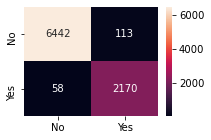

Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2809
           1       0.82      0.88      0.85       569

    accuracy                           0.95      3378
   macro avg       0.90      0.92      0.91      3378
weighted avg       0.95      0.95      0.95      3378



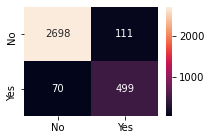

AUC for the Training Data: 0.998
AUC for the Test Data: 0.972


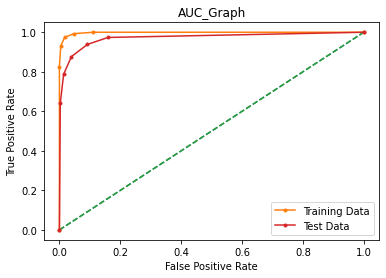

Inference
	 We have a good  accuracy of 0.946 in test data
	 We have a very good AUC of 0.972 in test data
	 Based on priority of churning
	 Precision  of 1= 0.818, medium value 
	 Recall or sensitivity of 1 = 0.877, good value 
	 f1 score of 1 = 0.846, medium value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem,Transform
0,knn,Train,0,0.991,0.983,0.987,0.981,0.998,True,True,True
1,knn,Train,1,0.951,0.974,0.962,0.981,0.998,True,True,True
2,knn,Test,0,0.975,0.960,0.968,0.946,0.972,True,True,True
3,knn,Test,1,0.818,0.877,0.846,0.946,0.972,True,True,True


In [121]:
target='Churn'
data=df_out0.copy()
name='knn'
model_type=KNeighborsClassifier(n_jobs=-1)
sm_rt=round(data[target].value_counts(normalize=True).min(),2)*2
knn4,mknn4=model_analysis(data,target,model_type,Ratio=0.30,print_values=True,Scaled=True,
                   apply_smote=[True,sm_rt],Test=False,Train=False,RA=True,
                   out_rem=True,model_name=name)
knn4['Transform']=True
round(knn4,3)

In [122]:
knn=pd.concat([knn1,knn2,knn3,knn4],axis=0)
knn.reset_index(inplace=True)
knn.drop(['index'],axis=1,inplace=True)
round(knn,3)

,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem,Transform
0,knn,Train,0,0.977,0.991,0.984,0.973,0.994,False,False,NaN
1,knn,Train,1,0.951,0.884,0.916,0.973,0.994,False,False,NaN
2,knn,Test,0,0.951,0.974,0.963,0.937,0.960,False,False,NaN
3,knn,Test,1,0.856,0.754,0.802,0.937,0.960,False,False,NaN
4,knn,Train,0,0.981,0.992,0.986,0.977,0.996,False,True,NaN
5,knn,Train,1,0.958,0.905,0.931,0.977,0.996,False,True,NaN
6,knn,Test,0,0.959,0.980,0.969,0.948,0.969,False,True,NaN
7,knn,Test,1,0.888,0.794,0.839,0.948,0.969,False,True,NaN
8,knn,Train,0,0.991,0.983,0.987,0.981,0.998,True,True,NaN
9,knn,Train,1,0.951,0.974,0.962,0.981,0.998,True,True,NaN


In [134]:
round(knn[knn['Test/Train']=='Test'],3)

,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem,Transform
2,knn,Test,0,0.951,0.974,0.963,0.937,0.960,False,False,NaN
3,knn,Test,1,0.856,0.754,0.802,0.937,0.960,False,False,NaN
6,knn,Test,0,0.959,0.980,0.969,0.948,0.969,False,True,NaN
7,knn,Test,1,0.888,0.794,0.839,0.948,0.969,False,True,NaN
10,knn,Test,0,0.975,0.960,0.968,0.946,0.972,True,True,NaN
11,knn,Test,1,0.818,0.877,0.846,0.946,0.972,True,True,NaN
14,knn,Test,0,0.975,0.960,0.968,0.946,0.972,True,True,True
15,knn,Test,1,0.818,0.877,0.846,0.946,0.972,True,True,True


### Evaluation

In [126]:
opt=pd.concat([lr,rf,svm,knn,nb,lda],axis=0)
opt.reset_index(inplace=True)
opt.drop(['index'],axis=1,inplace=True)
round(opt[(opt['0/1']=='1') & (opt['Test/Train']=='Test')],3)

,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem,Transform
3,lr,Test,1,0.747,0.425,0.542,0.879,0.847,False,False,NaN
7,lr,Test,1,0.742,0.480,0.583,0.884,0.855,False,True,NaN
11,lr,Test,1,0.729,0.520,0.607,0.887,0.861,True,True,NaN
15,lr,Test,1,0.729,0.520,0.607,0.887,0.861,True,True,True
19,LR_ST,Test,1,0.594,0.524,0.557,0.860,0.844,True,True,NaN
23,RF,Test,1,0.981,0.835,0.902,0.970,0.992,False,False,NaN
27,RF,Test,1,0.992,0.847,0.914,0.973,0.993,False,True,NaN
31,RF,Test,1,0.986,0.858,0.917,0.974,0.993,True,True,NaN
35,RF,Test,1,0.990,0.835,0.906,0.971,0.992,True,False,True
39,svm,Test,1,0.923,0.608,0.733,0.925,NaN,False,False,NaN


# Parameter Tuning

## Logistic Reg

In [127]:
lr[(lr['Test/Train']=='Test') & (lr['0/1']=='1')]

,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem,Transform
3,lr,Test,1,0.746914,0.425308,0.541993,0.878922,0.847039,False,False,NaN
7,lr,Test,1,0.741848,0.479789,0.582711,0.884251,0.854646,False,True,NaN
11,lr,Test,1,0.729064,0.520211,0.607179,0.886619,0.861331,True,True,NaN
15,lr,Test,1,0.729064,0.520211,0.607179,0.886619,0.861331,True,True,True
19,LR_ST,Test,1,0.594203,0.523962,0.556876,0.859526,0.843578,True,True,NaN


In [137]:
rt=['Tenure','Day_Since_CC_connect']
log=['rev_per_month','rev_growth_yoy','coupon_used_for_payment','cashback']

Best Parameters {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score: 0.8098567159914024
Train Data
Counter({0: 6555, 1: 1594})
Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2809
           1       0.76      0.49      0.59       569

    accuracy                           0.89      3378
   macro avg       0.83      0.73      0.76      3378
weighted avg       0.88      0.89      0.88      3378



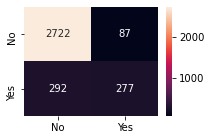

AUC for the Test Data: 0.869


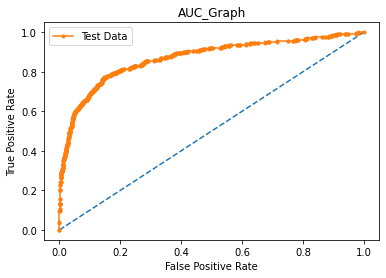

Inference
	 We have performed cross validation thrice with best score of 0.81
	 The best parameters are  {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
	 We have a good  accuracy of 0.888 in test data
	 We have a good AUC of 0.869 in test data
	 Based on priority of churning
	 Precision  of 1= 0.761, medium value 
	 Recall or sensitivity of 1 = 0.487, very bad value 
	 f1 score of 1 = 0.594, very bad value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,LR,Test,0,0.903,0.969,0.935,0.888,0.81,0.869,True,True
1,LR,Test,1,0.761,0.487,0.594,0.888,0.81,0.869,True,True


In [45]:
target='Churn'
data=df_tf.copy()
for i in log:
    data[i]=np.log(data[i])
    data[i]=data[i].replace(-np.inf,0)
for i in rt:
    data[i]=np.power(data[i],0.25)
name='LR'
model_type=LogisticRegression(random_state = 0,n_jobs = -1)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1','elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]

param_grid = dict(solver=solvers,penalty=penalty,C=c_values)


lr000,mlr000=GS_analysis(data,target,param_grid,model_type,Ratio=0.30,print_values=True,
                   Scaled=False,apply_smote=[True,0.34],RA=True,
                  model_name=name,out_rem=True)
round(lr000,3)

Best Parameters {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score: 0.8052543990228634
Train Data
Counter({0: 6555, 1: 1544})
Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2809
           1       0.79      0.49      0.61       569

    accuracy                           0.89      3378
   macro avg       0.85      0.73      0.77      3378
weighted avg       0.88      0.89      0.88      3378



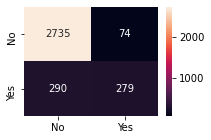

AUC for the Test Data: 0.861


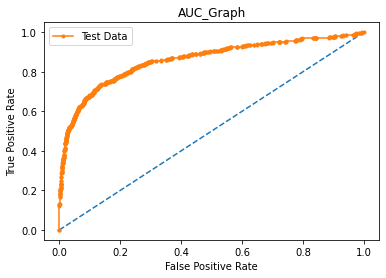

Inference
	 We have performed cross validation thrice with best score of 0.805
	 The best parameters are  {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
	 We have a good  accuracy of 0.892 in test data
	 We have a good AUC of 0.861 in test data
	 Based on priority of churning
	 Precision  of 1= 0.79, medium value 
	 Recall or sensitivity of 1 = 0.49, very bad value 
	 f1 score of 1 = 0.605, very bad value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,LR,Test,0,0.904,0.974,0.938,0.892,0.805,0.861,True,True
1,LR,Test,1,0.790,0.490,0.605,0.892,0.805,0.861,True,True


In [256]:
target='Churn'
data=df_out.copy()
name='LR'
model_type=LogisticRegression(random_state = 0,n_jobs = -1)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1','elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]

param_grid = dict(solver=solvers,penalty=penalty,C=c_values)


lr0,mlr0=GS_analysis(data,target,param_grid,model_type,Ratio=0.30,print_values=True,
                   Scaled=False,apply_smote=[True,0.34],RA=True,
                  model_name=name,out_rem=True)
round(lr0,3)

In [258]:
flr0=pd.DataFrame({'Variable':list(mlr0.best_estimator_.feature_names_in_),
              'Importance':list(mlr0.best_estimator_.coef_[0])}).sort_values('Importance', ascending=False)
display(flr0.head(10))
display(flr0.tail(10))

,Variable,Importance
8,Complain_ly,1.032343
25,Marital_Status_Single,0.356758
5,Account_user_count,0.304601
1,City_Tier,0.287582
20,account_segment_Regular Plus,0.236034
6,CC_Agent_Score,0.218936
13,Payment_Cash on Delivery,0.170632
19,account_segment_Regular,0.142604
18,account_segment_HNI,0.139567
16,Payment_E wallet,0.134920


,Variable,Importance
4,Service_Score,-0.066549
11,Day_Since_CC_connect,-0.066694
17,Payment_UPI,-0.091350
0,Tenure,-0.169867
3,Gender,-0.173367
27,Login_device_Mobile,-0.203480
23,Marital_Status_Divorced,-0.206648
14,Payment_Credit Card,-0.227193
24,Marital_Status_Married,-0.406564
21,account_segment_Super,-0.578314


## Random forest

In [58]:
rf[(rf['Test/Train']=='Test') & (rf['0/1']=='1')]

,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem
3,RF,Test,1,0.981405,0.834798,0.902184,0.969509,0.992319,False,False
7,RF,Test,1,0.991770,0.847100,0.913744,0.973061,0.992695,False,True
11,RF,Test,1,0.985859,0.857645,0.917293,0.973949,0.992543,True,True


Best Parameters {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}
Best Score: 0.9712648482111689
Train Data
Counter({0: 6555, 1: 1544})
Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2809
           1       0.99      0.89      0.94       569

    accuracy                           0.98      3378
   macro avg       0.98      0.94      0.96      3378
weighted avg       0.98      0.98      0.98      3378



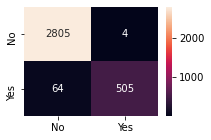

AUC for the Test Data: 0.997


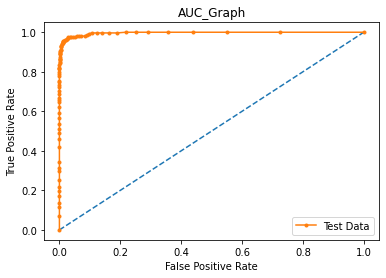

Inference
	 We have performed cross validation thrice with best score of 0.971
	 The best parameters are  {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}
	 We have a very good  accuracy of 0.98 in test data
	 We have a very good AUC of 0.997 in test data
	 Based on priority of churning
	 Precision  of 1= 0.992, very good value 
	 Recall or sensitivity of 1 = 0.888, good value 
	 f1 score of 1 = 0.937, good value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,RF,Test,0,0.978,0.999,0.988,0.98,0.971,0.997,True,True
1,RF,Test,1,0.992,0.888,0.937,0.98,0.971,0.997,True,True


In [141]:
target='Churn'
data=df_out.copy()
name='RF'
model_type=RandomForestClassifier(random_state=0)

param_grid = {  'bootstrap': [True,False], 'max_depth': [10,15, None], 
              'max_features': ['auto', 'log2'], 'n_estimators': [50,100,150]}

rf0,mrf0=GS_analysis(data,target,param_grid,model_type,Ratio=0.30,print_values=True,
                   Scaled=False,apply_smote=[True,0.34],RA=True,
                  model_name=name,out_rem=True)
round(rf0,3)

In [ ]:
mlda0.best_estimator_.

In [261]:
frf0=pd.DataFrame({'Variable':list(mrf0.best_estimator_.feature_names_in_),
              'Importance':list(mrf0.best_estimator_.feature_importances_)}).sort_values('Importance', ascending=False)
display(frf0.head(10))
display(frf0.tail(10))

,Variable,Importance
0,Tenure,0.228160
12,cashback,0.075445
11,Day_Since_CC_connect,0.066926
2,CC_Contacted_LY,0.064883
8,Complain_ly,0.061620
9,rev_growth_yoy,0.059547
6,CC_Agent_Score,0.057273
7,rev_per_month,0.050030
5,Account_user_count,0.037352
10,coupon_used_for_payment,0.028505


,Variable,Importance
27,Login_device_Mobile,0.014479
21,account_segment_Super,0.014259
26,Login_device_Computer,0.013012
13,Payment_Cash on Delivery,0.012634
16,Payment_E wallet,0.012542
17,Payment_UPI,0.008207
18,account_segment_HNI,0.007920
23,Marital_Status_Divorced,0.007485
22,account_segment_Super Plus,0.004031
19,account_segment_Regular,0.003207


## LDA

In [60]:
lda

,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem
0,lda,Train,0,0.883553,0.971167,0.925291,0.869576,0.845480,False,False
1,lda,Train,1,0.720827,0.367747,0.487026,0.869576,0.845480,False,False
2,lda,Test,0,0.884217,0.973300,0.926623,0.871818,0.826564,False,False
3,lda,Test,1,0.737762,0.370826,0.493567,0.871818,0.826564,False,False
4,lda,Train,0,0.901191,0.969794,0.934235,0.886450,0.878509,False,True
5,lda,Train,1,0.760870,0.474755,0.584687,0.886450,0.878509,False,True
6,lda,Test,0,0.899934,0.973300,0.935180,0.887803,0.858700,False,True
7,lda,Test,1,0.779412,0.465729,0.583058,0.887803,0.858700,False,True
8,lda,Train,0,0.892897,0.966590,0.928284,0.879121,0.884250,True,True
9,lda,Train,1,0.781655,0.507772,0.615626,0.879121,0.884250,True,True


In [61]:
lda[(lda['Test/Train']=='Test') & (lda['0/1']=='1')]

,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem
3,lda,Test,1,0.737762,0.370826,0.493567,0.871818,0.826564,False,False
7,lda,Test,1,0.779412,0.465729,0.583058,0.887803,0.858700,False,True
11,lda,Test,1,0.767442,0.463972,0.578313,0.886027,0.858495,True,True


Best Parameters {'solver': 'svd', 'tol': 0.0001}
Best Score: 0.7099438491262925
Train Data
Counter({0: 6555, 1: 1327})
Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2809
           1       0.70      0.55      0.62       569

    accuracy                           0.88      3378
   macro avg       0.81      0.75      0.77      3378
weighted avg       0.88      0.88      0.88      3378



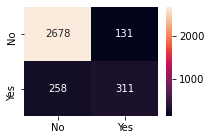

AUC for the Test Data: 0.876


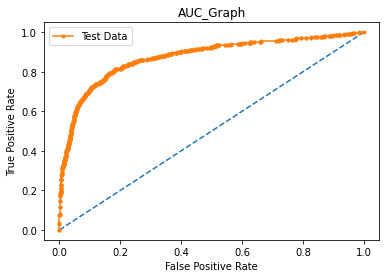

Inference
	 We have performed cross validation thrice with best score of 0.71
	 The best parameters are  {'solver': 'svd', 'tol': 0.0001}
	 We have a good  accuracy of 0.885 in test data
	 We have a good AUC of 0.876 in test data
	 Based on priority of churning
	 Precision  of 1= 0.704, bad value 
	 Recall or sensitivity of 1 = 0.547, very bad value 
	 f1 score of 1 = 0.615, very bad value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,LDA,Test,0,0.912,0.953,0.932,0.885,0.71,0.876,False,True
1,LDA,Test,1,0.704,0.547,0.615,0.885,0.71,0.876,False,True


In [139]:
data=df_out.copy()
name='LDA'
for i in log:
    data[i]=np.log(data[i])
    data[i]=data[i].replace(-np.inf,0)
for i in rt:
    data[i]=np.power(data[i],0.25)
    target='Churn'

model_type=LDA()
param_grid = dict()
param_grid['solver'] = ['svd', 'lsqr', 'eigen']
param_grid[ "tol" ]= [0.0001,0.0002,0.0003]

lda000,mlda000=GS_analysis(data,target,param_grid,model_type,Ratio=0.30,print_values=True,
                   Scaled=False,apply_smote=[False,0.34],RA=True,
                  model_name=name,out_rem=True)
round(lda000,3)

Best Parameters {'solver': 'svd', 'tol': 0.0001}
Best Score: 0.7538621654537953
Train Data
Counter({0: 6555, 1: 1327})
Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2809
           1       0.78      0.47      0.58       569

    accuracy                           0.89      3378
   macro avg       0.84      0.72      0.76      3378
weighted avg       0.88      0.89      0.88      3378



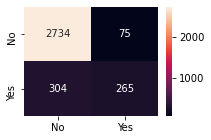

AUC for the Test Data: 0.859


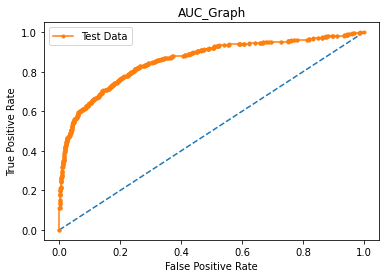

Inference
	 We have performed cross validation thrice with best score of 0.754
	 The best parameters are  {'solver': 'svd', 'tol': 0.0001}
	 We have a good  accuracy of 0.888 in test data
	 We have a good AUC of 0.859 in test data
	 Based on priority of churning
	 Precision  of 1= 0.779, medium value 
	 Recall or sensitivity of 1 = 0.466, very bad value 
	 f1 score of 1 = 0.583, very bad value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,LDA,Test,0,0.900,0.973,0.935,0.888,0.754,0.859,False,True
1,LDA,Test,1,0.779,0.466,0.583,0.888,0.754,0.859,False,True


In [143]:

target='Churn'
data=df_out.copy()
name='LDA'
model_type=LDA()
param_grid = dict()
param_grid['solver'] = ['svd', 'lsqr', 'eigen']
param_grid[ "tol" ]= [0.0001,0.0002,0.0003]

lda0,mlda0=GS_analysis(data,target,param_grid,model_type,Ratio=0.30,print_values=True,
                   Scaled=False,apply_smote=[False,0.34],RA=True,
                  model_name=name,out_rem=True)
round(lda0,3)

In [259]:
flda0=pd.DataFrame({'Variable':list(mlda0.best_estimator_.feature_names_in_),
              'Importance':list(mlda0.best_estimator_.coef_[0])}).sort_values('Importance', ascending=False)
display(flda0.head(10))
display(flda0.tail(10))

,Variable,Importance
8,Complain_ly,1.931968
19,account_segment_Regular,1.267949
22,account_segment_Super Plus,0.763219
25,Marital_Status_Single,0.691390
13,Payment_Cash on Delivery,0.632367
5,Account_user_count,0.402560
1,City_Tier,0.376159
16,Payment_E wallet,0.347428
20,account_segment_Regular Plus,0.304645
6,CC_Agent_Score,0.283199


,Variable,Importance
4,Service_Score,-0.079967
15,Payment_Debit Card,-0.088620
0,Tenure,-0.129205
17,Payment_UPI,-0.139538
27,Login_device_Mobile,-0.220447
3,Gender,-0.239294
14,Payment_Credit Card,-0.263650
23,Marital_Status_Divorced,-0.298635
24,Marital_Status_Married,-0.438020
21,account_segment_Super,-0.898377


## SVM

In [63]:
svm[(svm['Test/Train']=='Test') & (svm['0/1']=='1')]

,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem
3,svm,Test,1,0.922667,0.608084,0.733051,0.925400,NaN,False,False
7,svm,Test,1,0.927500,0.652021,0.765738,0.932800,NaN,False,True
11,svm,Test,1,0.854291,0.752197,0.800000,0.936649,NaN,True,True


Best Parameters {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best Score: 0.9992406985573273
Train Data
Counter({0: 6555, 1: 2228})
Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2809
           1       1.00      0.45      0.62       569

    accuracy                           0.91      3378
   macro avg       0.95      0.72      0.78      3378
weighted avg       0.92      0.91      0.89      3378



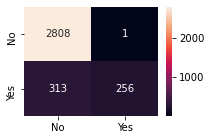

Inference
	 We have performed cross validation thrice with best score of 0.999
	 The best parameters are  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
	 We have a good  accuracy of 0.907 in test data
	 We have a very bad AUC of nan in test data
	 Based on priority of churning
	 Precision  of 1= 0.996, very good value 
	 Recall or sensitivity of 1 = 0.45, very bad value 
	 f1 score of 1 = 0.62, very bad value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,SVM,Test,0,0.900,1.00,0.947,0.907,0.999,NaN,True,False
1,SVM,Test,1,0.996,0.45,0.620,0.907,0.999,NaN,True,False


In [138]:

target='Churn'
data=df_out.copy()
name='SVM'
for i in log:
    data[i]=np.log(data[i])
    data[i]=data[i].replace(-np.inf,0)
for i in rt:
    data[i]=np.power(data[i],0.25)
model_type=SVC(random_state=0)
param_grid = {'kernel': ['rbf','sigmoid'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100, 200]}


svm000,msvm000=GS_analysis(data,target,param_grid,model_type,Ratio=0.30,print_values=True,
                   Scaled=True,apply_smote=[True,0.34],RA=False,
                  model_name=name,out_rem=False)
round(svm000,3)

Best Parameters {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best Score: 0.9992044550517104
Train Data
Counter({0: 6555, 1: 2228})
Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2809
           1       0.99      0.38      0.55       569

    accuracy                           0.90      3378
   macro avg       0.94      0.69      0.75      3378
weighted avg       0.91      0.90      0.88      3378



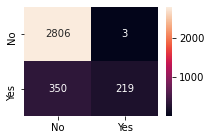

Inference
	 We have performed cross validation thrice with best score of 0.999
	 The best parameters are  {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
	 We have a good  accuracy of 0.896 in test data
	 We have a very bad AUC of nan in test data
	 Based on priority of churning
	 Precision  of 1= 0.986, very good value 
	 Recall or sensitivity of 1 = 0.385, very bad value 
	 f1 score of 1 = 0.554, very bad value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,SVM,Test,0,0.889,0.999,0.941,0.896,0.999,NaN,True,False
1,SVM,Test,1,0.986,0.385,0.554,0.896,0.999,NaN,True,False


In [150]:

target='Churn'
data=df_out.copy()
name='SVM'
model_type=SVC(random_state=0)
param_grid = {'kernel': ['rbf','sigmoid'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100, 200]}


svm0,msvm0=GS_analysis(data,target,param_grid,model_type,Ratio=0.30,print_values=True,
                   Scaled=True,apply_smote=[True,0.34],RA=False,
                  model_name=name,out_rem=False)
round(svm0,3)

## Naive Bayes

In [65]:
nb[(nb['Test/Train']=='Test') & (nb['0/1']=='1')]

,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem
3,nb,Test,1,0.418578,0.641476,0.506593,0.789520,0.774371,False,False
7,nb,Test,1,0.390504,0.708260,0.503435,0.764654,0.792829,False,True
11,nb,Test,1,0.345576,0.727592,0.468591,0.722025,0.791475,True,True


1. priors : array-like of shape (n_classes,)
Prior probabilities of the classes. If specified the priors are not adjusted according to the data.

2. var_smoothing : float, default=1e-9

Best Parameters {'var_smoothing': 1.0}
Best Score: 0.7096860413401211
Train Data
Counter({0: 6555, 1: 1327})
Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2809
           1       0.69      0.39      0.50       569

    accuracy                           0.87      3378
   macro avg       0.79      0.68      0.71      3378
weighted avg       0.85      0.87      0.85      3378



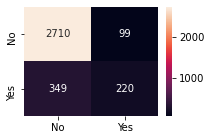

AUC for the Test Data: 0.816


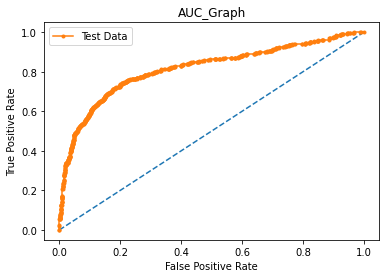

Inference
	 We have performed cross validation thrice with best score of 0.71
	 The best parameters are  {'var_smoothing': 1.0}
	 We have a good  accuracy of 0.867 in test data
	 We have a medium AUC of 0.816 in test data
	 Based on priority of churning
	 Precision  of 1= 0.69, bad value 
	 Recall or sensitivity of 1 = 0.387, very bad value 
	 f1 score of 1 = 0.495, very bad value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,nb,Test,0,0.886,0.965,0.924,0.867,0.71,0.816,False,False
1,nb,Test,1,0.690,0.387,0.495,0.867,0.71,0.816,False,False


In [48]:
data=df_tf.copy()

name='nb'
for i in log:
    data[i]=np.log(data[i])
    data[i]=data[i].replace(-np.inf,0)
for i in rt:
    data[i]=np.power(data[i],0.25)
target='Churn'

model_type=GaussianNB()
param_grid = {'var_smoothing': np.logspace(0,-9, num=120)}

nb000,mnb000=GS_analysis(data,target,param_grid,model_type,Ratio=0.30,print_values=True,
                   Scaled=True,apply_smote=[False,0.34],RA=True,
                  model_name=name,out_rem=False)
round(nb000,3)

Best Parameters {'var_smoothing': 1.0}
Best Score: 0.6400570101971848
Train Data
Counter({0: 6555, 1: 1327})
Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.86      0.97      0.92      2809
           1       0.65      0.25      0.36       569

    accuracy                           0.85      3378
   macro avg       0.76      0.61      0.64      3378
weighted avg       0.83      0.85      0.82      3378



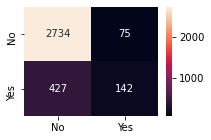

AUC for the Test Data: 0.782


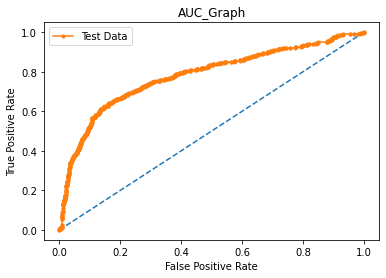

Inference
	 We have performed cross validation thrice with best score of 0.64
	 The best parameters are  {'var_smoothing': 1.0}
	 We have a good  accuracy of 0.851 in test data
	 We have a medium AUC of 0.782 in test data
	 Based on priority of churning
	 Precision  of 1= 0.654, bad value 
	 Recall or sensitivity of 1 = 0.25, very bad value 
	 f1 score of 1 = 0.361, very bad value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,nb,Test,0,0.865,0.973,0.916,0.851,0.64,0.782,False,False
1,nb,Test,1,0.654,0.250,0.361,0.851,0.64,0.782,False,False


In [66]:

target='Churn'
data=df_tf.copy()

name='nb'
model_type=GaussianNB()
param_grid = {'var_smoothing': np.logspace(0,-9, num=120)}

nb0,mnb0=GS_analysis(data,target,param_grid,model_type,Ratio=0.30,print_values=True,
                   Scaled=True,apply_smote=[False,0.34],RA=True,
                  model_name=name,out_rem=False)
round(nb0,3)

## KNN

In [67]:
knn[(knn['Test/Train']=='Test') & (knn['0/1']=='1')]

,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem
3,knn,Test,1,0.856287,0.753954,0.801869,0.937241,0.960003,False,False
7,knn,Test,1,0.888016,0.794376,0.838590,0.948490,0.968623,False,True
11,knn,Test,1,0.818033,0.876977,0.846480,0.946418,0.971715,True,True


n_neighbors -> Number of neighbors to use by default for kneighbors queries.

weights -> weight function used in prediction. {uniform,distance}

algorithm-> Algorithm used to compute the nearest neighbors. {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}

p -> Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

leaf_size -> Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

Best Parameters {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}
Best Score: 0.9341727939520089
Train Data
Counter({0: 6555, 1: 1327})
Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2809
           1       0.96      0.77      0.86       569

    accuracy                           0.96      3378
   macro avg       0.96      0.88      0.91      3378
weighted avg       0.96      0.96      0.95      3378



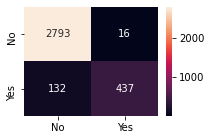

AUC for the Test Data: 0.989


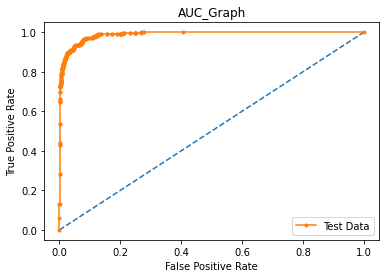

Inference
	 We have performed cross validation thrice with best score of 0.934
	 The best parameters are  {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}
	 We have a very good  accuracy of 0.956 in test data
	 We have a very good AUC of 0.989 in test data
	 Based on priority of churning
	 Precision  of 1= 0.965, very good value 
	 Recall or sensitivity of 1 = 0.768, medium value 
	 f1 score of 1 = 0.855, good value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,KNN,Test,0,0.955,0.994,0.974,0.956,0.934,0.989,False,True
1,KNN,Test,1,0.965,0.768,0.855,0.956,0.934,0.989,False,True


In [145]:

target='Churn'
data=df_out.copy()
name='KNN'
model_type=KNeighborsClassifier(n_jobs=-1)
param_grid =  { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

knn0,mknn0=GS_analysis(data,target,param_grid,model_type,Ratio=0.30,print_values=True,
                   Scaled=True,apply_smote=[False,0.34],RA=True,
                  model_name=name,out_rem=True)
round(knn0,3)

In [146]:
final=pd.concat([rf0,lda000,svm000,nb000,knn0],axis=0)
final

,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,RF,Test,0,0.977693,0.998576,0.988024,0.979870,0.971265,0.996603,True,True
1,RF,Test,1,0.992141,0.887522,0.936920,0.979870,0.971265,0.996603,True,True
0,LDA,Test,0,0.912125,0.953364,0.932289,0.884843,0.709944,0.875583,False,True
1,LDA,Test,1,0.703620,0.546573,0.615232,0.884843,0.709944,0.875583,False,True
0,SVM,Test,0,0.899712,0.999644,0.947049,0.907046,0.999241,NaN,True,False
1,SVM,Test,1,0.996109,0.449912,0.619855,0.907046,0.999241,NaN,True,False
0,nb,Test,0,0.864916,0.973300,0.915913,0.851391,0.640057,0.782149,False,False
1,nb,Test,1,0.654378,0.249561,0.361323,0.851391,0.640057,0.782149,False,False
0,KNN,Test,0,0.954872,0.994304,0.974189,0.956187,0.934173,0.988938,False,True
1,KNN,Test,1,0.964680,0.768014,0.855186,0.956187,0.934173,0.988938,False,True


# Ensemble Techniques

###  AdaBoosting
The module sklearn.ensemble includes the popular boosting algorithm AdaBoost, introduced in 1995 by Freund and Schapire

The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction.

The number of weak learners is controlled by the parameter n_estimators. The learning_rate parameter controls the contribution of the weak learners in the final combination. By default, weak learners are decision stumps. Different weak learners can be specified through the base_estimator parameter. The main parameters to tune to obtain good results are n_estimators and the complexity of the base estimators (e.g., its depth max_depth or minimum required number of samples to consider a split min_samples_split).




Train_score: 0.8941844672181751
Test_score: 0.9005328596802842
Train Data
Counter({0: 6555, 1: 1544})
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6555
           1       0.77      0.63      0.69      1544

    accuracy                           0.89      8099
   macro avg       0.85      0.79      0.81      8099
weighted avg       0.89      0.89      0.89      8099



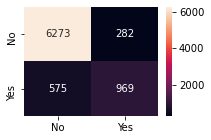

Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2809
           1       0.75      0.62      0.68       569

    accuracy                           0.90      3378
   macro avg       0.84      0.79      0.81      3378
weighted avg       0.90      0.90      0.90      3378



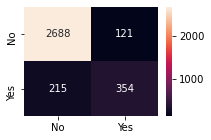

AUC for the Training Data: 0.925
AUC for the Test Data: 0.911


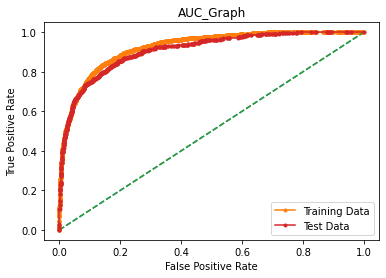

Inference
	 We have a good  accuracy of 0.901 in test data
	 We have a good AUC of 0.911 in test data
	 Based on priority of churning
	 Precision  of 1= 0.745, bad value 
	 Recall or sensitivity of 1 = 0.622, very bad value 
	 f1 score of 1 = 0.678, bad value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem
0,ADB,Train,0,0.916,0.957,0.936,0.894,0.925,True,True
1,ADB,Train,1,0.775,0.628,0.693,0.894,0.925,True,True
2,ADB,Test,0,0.926,0.957,0.941,0.901,0.911,True,True
3,ADB,Test,1,0.745,0.622,0.678,0.901,0.911,True,True


In [147]:

from sklearn.ensemble import AdaBoostClassifier

clfADB = AdaBoostClassifier(n_estimators=100)
target='Churn'
data=df_out.copy()
name='ADB'
model_type=AdaBoostClassifier(n_estimators=100)

adb,madb=model_analysis(data,target,model_type,Ratio=0.30,print_values=True,Scaled=False,
                   apply_smote=[True,0.34],Test=False,Train=False,RA=True,
                   out_rem=True,model_name=name)
round(adb,3)

## Gradient Boosting
Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.



Train_score: 0.9015927892332387
Test_score: 0.9046773238602723
Train Data
Counter({0: 6555, 1: 1544})
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6555
           1       0.82      0.62      0.71      1544

    accuracy                           0.90      8099
   macro avg       0.87      0.79      0.82      8099
weighted avg       0.90      0.90      0.90      8099



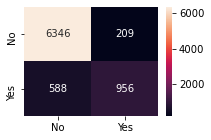

Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2809
           1       0.80      0.57      0.67       569

    accuracy                           0.90      3378
   macro avg       0.86      0.77      0.81      3378
weighted avg       0.90      0.90      0.90      3378



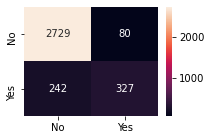

AUC for the Training Data: 0.930
AUC for the Test Data: 0.912


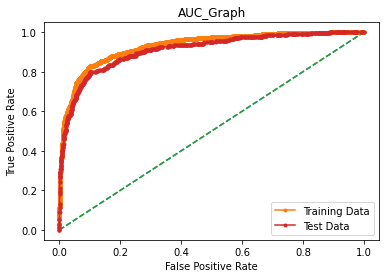

Inference
	 We have a good  accuracy of 0.905 in test data
	 We have a good AUC of 0.912 in test data
	 Based on priority of churning
	 Precision  of 1= 0.803, medium value 
	 Recall or sensitivity of 1 = 0.575, very bad value 
	 f1 score of 1 = 0.67, bad value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem
0,gb,Train,0,0.915,0.968,0.941,0.902,0.930,True,True
1,gb,Train,1,0.821,0.619,0.706,0.902,0.930,True,True
2,gb,Test,0,0.919,0.972,0.944,0.905,0.912,True,True
3,gb,Test,1,0.803,0.575,0.670,0.905,0.912,True,True


In [148]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
target='Churn'
data=df_out.copy()
name='gb'
model_type=GradientBoostingClassifier(n_estimators = 50,random_state=1)

gb,mgb=model_analysis(data,target,model_type,Ratio=0.30,print_values=True,Scaled=False,
                   apply_smote=[True,0.34],Test=False,Train=False,RA=True,
                   out_rem=True,model_name=name)
round(gb,3)

## Bagging Classifier¶
A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.



Train_score: 1.0
Test_score: 0.9680284191829485
Train Data
Counter({0: 6555, 1: 1544})
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1544

    accuracy                           1.00      8099
   macro avg       1.00      1.00      1.00      8099
weighted avg       1.00      1.00      1.00      8099



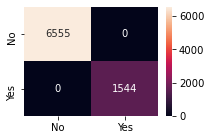

Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2809
           1       0.94      0.87      0.90       569

    accuracy                           0.97      3378
   macro avg       0.96      0.93      0.94      3378
weighted avg       0.97      0.97      0.97      3378



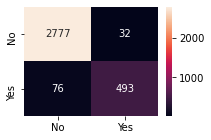

AUC for the Training Data: 1.000
AUC for the Test Data: 0.989


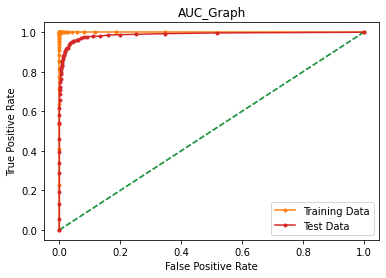

Inference
	 We have a very good  accuracy of 0.968 in test data
	 We have a very good AUC of 0.989 in test data
	 Based on priority of churning
	 Precision  of 1= 0.939, good value 
	 Recall or sensitivity of 1 = 0.866, good value 
	 f1 score of 1 = 0.901, good value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,AUC,SMOTE,out_rem
0,bgc,Train,0,1.000,1.000,1.000,1.000,1.000,True,True
1,bgc,Train,1,1.000,1.000,1.000,1.000,1.000,True,True
2,bgc,Test,0,0.973,0.989,0.981,0.968,0.989,True,True
3,bgc,Test,1,0.939,0.866,0.901,0.968,0.989,True,True


In [149]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50,random_state=1)
target='Churn'
data=df_out.copy()
name='bgc'
model_type= BaggingClassifier(n_estimators=50,random_state=1)

bgc,mbgc=model_analysis(data,target,model_type,Ratio=0.30,print_values=True,Scaled=False,
                   apply_smote=[True,0.34],Test=False,Train=False,RA=True,
                   out_rem=True,model_name=name)
round(bgc,3)

## OPtimum model

In [150]:
final0=pd.concat([rf0,lda000,svm000,nb000,knn0,adb,gb,bgc],axis=0)
final0.reset_index(inplace=True)
final0.drop('index',axis=1,inplace=True)
final0

,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,RF,Test,0,0.977693,0.998576,0.988024,0.979870,0.971265,0.996603,True,True
1,RF,Test,1,0.992141,0.887522,0.936920,0.979870,0.971265,0.996603,True,True
2,LDA,Test,0,0.912125,0.953364,0.932289,0.884843,0.709944,0.875583,False,True
3,LDA,Test,1,0.703620,0.546573,0.615232,0.884843,0.709944,0.875583,False,True
4,SVM,Test,0,0.899712,0.999644,0.947049,0.907046,0.999241,NaN,True,False
5,SVM,Test,1,0.996109,0.449912,0.619855,0.907046,0.999241,NaN,True,False
6,nb,Test,0,0.864916,0.973300,0.915913,0.851391,0.640057,0.782149,False,False
7,nb,Test,1,0.654378,0.249561,0.361323,0.851391,0.640057,0.782149,False,False
8,KNN,Test,0,0.954872,0.994304,0.974189,0.956187,0.934173,0.988938,False,True
9,KNN,Test,1,0.964680,0.768014,0.855186,0.956187,0.934173,0.988938,False,True


In [151]:
final0[(final0['0/1']=='1')].sort_values(by='accuracy',ascending=False)

,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
19,bgc,Train,1,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,True,True
1,RF,Test,1,0.992141,0.887522,0.936920,0.979870,0.971265,0.996603,True,True
21,bgc,Test,1,0.939048,0.866432,0.901280,0.968028,NaN,0.988573,True,True
9,KNN,Test,1,0.964680,0.768014,0.855186,0.956187,0.934173,0.988938,False,True
5,SVM,Test,1,0.996109,0.449912,0.619855,0.907046,0.999241,NaN,True,False
17,gb,Test,1,0.803440,0.574692,0.670082,0.904677,NaN,0.912157,True,True
15,gb,Train,1,0.820601,0.619171,0.705795,0.901593,NaN,0.930493,True,True
13,ADB,Test,1,0.745263,0.622144,0.678161,0.900533,NaN,0.910928,True,True
11,ADB,Train,1,0.774580,0.627591,0.693381,0.894184,NaN,0.925189,True,True
3,LDA,Test,1,0.703620,0.546573,0.615232,0.884843,0.709944,0.875583,False,True


In [152]:
target='Churn'
data=df_out.copy()
X1=data.drop(target,axis=1)
RF1_imp=pd.DataFrame({'Variable':X1.columns,
              'Importance':mrf0.best_estimator_.feature_importances_}).sort_values('Importance', ascending=False)
display(RF1_imp.head(10))
display(RF1_imp.tail(10))

,Variable,Importance
0,Tenure,0.228160
12,cashback,0.075445
11,Day_Since_CC_connect,0.066926
2,CC_Contacted_LY,0.064883
8,Complain_ly,0.061620
9,rev_growth_yoy,0.059547
6,CC_Agent_Score,0.057273
7,rev_per_month,0.050030
5,Account_user_count,0.037352
10,coupon_used_for_payment,0.028505


,Variable,Importance
27,Login_device_Mobile,0.014479
21,account_segment_Super,0.014259
26,Login_device_Computer,0.013012
13,Payment_Cash on Delivery,0.012634
16,Payment_E wallet,0.012542
17,Payment_UPI,0.008207
18,account_segment_HNI,0.007920
23,Marital_Status_Divorced,0.007485
22,account_segment_Super Plus,0.004031
19,account_segment_Regular,0.003207


Best Parameters {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 50}
Best Score: 0.9614725386976438
Train Data
Counter({0: 6555, 1: 2228})
Test Data
Counter({0: 2809, 1: 569})
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2809
           1       0.98      0.92      0.95       569

    accuracy                           0.98      3378
   macro avg       0.98      0.96      0.97      3378
weighted avg       0.98      0.98      0.98      3378



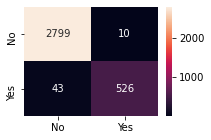

AUC for the Test Data: 0.995


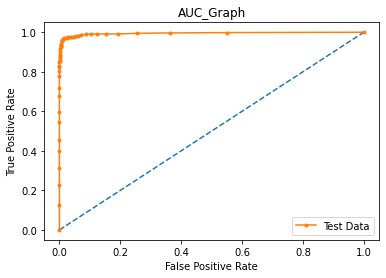

Inference
	 We have performed cross validation thrice with best score of 0.961
	 The best parameters are  {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 50}
	 We have a very good  accuracy of 0.984 in test data
	 We have a very good AUC of 0.995 in test data
	 Based on priority of churning
	 Precision  of 1= 0.981, very good value 
	 Recall or sensitivity of 1 = 0.924, good value 
	 f1 score of 1 = 0.952, very good value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,RF,Test,0,0.985,0.996,0.991,0.984,0.961,0.995,True,True
1,RF,Test,1,0.981,0.924,0.952,0.984,0.961,0.995,True,True


In [165]:
df3=df_imRF.copy()
target='Churn'
data=df3.copy()
name='RF'
model_type=RandomForestClassifier(random_state=0)

param_grid = {  'bootstrap': [True,False], 'max_depth': [10,15, None], 
              'max_features': ['auto', 'log2'], 'n_estimators': [50,100,150]}

rf00,mrf00=GS_analysis(data,target,param_grid,model_type,Ratio=0.30,print_values=True,
                   Scaled=False,apply_smote=[True,0.34],RA=True,
                  model_name=name,out_rem=True)
round(rf00,3)

In [164]:
# df2=df_cl.copy()
# target='Churn'
# num,cat,cat_str=seperate_datatype(df2)
# df_tmp=df_cl.copy()
# ## One heat encoding for 'Payment', 'account_segment', 'Marital_Status', 'Login_device'
# cat_oh=cat_str
# cat_oh.remove('Gender')
# df_tmp1=pd.get_dummies(df_tmp,columns=cat_oh)
# ## Binary encoding for gender
# df_tmp1['Gender']=df_tmp1['Gender'].replace({'F':1,'M':0})
# df_tf=df_tmp1.copy()
# # df_tf.info()
# df3=df_cl.copy()
# num,cat,cat_str=seperate_datatype(df3)
# cat_str.append('Gender')
# assg={}

# for j,i in enumerate(cat_str):
# #     print(j,'.')
#     df3[i],assg[i]=assign_num(data=df3,col=i)
# target='Churn'
# data=df3.copy()
# name='RF'
# model_type=RandomForestClassifier(random_state=0)

# param_grid = {  'bootstrap': [True,False], 'max_depth': [10,15, None], 
#               'max_features': ['auto', 'log2'], 'n_estimators': [50,100,150]}

# rf00,mrf00=GS_analysis(data,target,param_grid,model_type,Ratio=0.30,print_values=True,
#                    Scaled=False,apply_smote=[True,0.34],RA=True,
#                   model_name=name,out_rem=True)
# round(rf00,3)

In [167]:
target='Churn'
data=df3.copy()
X1=data.drop(target,axis=1)
rf2_imp=pd.DataFrame({'Variable':X1.columns,
              'Importance':mrf00.best_estimator_.feature_importances_}).sort_values('Importance', ascending=False)
display(rf2_imp.head(10))
display(rf2_imp.tail(10))
rf2_imp

,Variable,Importance
0,Tenure,0.298536
14,Day_Since_CC_connect,0.087956
15,cashback,0.074323
2,CC_Contacted_LY,0.057763
12,rev_growth_yoy,0.055829
10,rev_per_month,0.054322
6,Account_user_count,0.049704
8,CC_Agent_Score,0.049238
7,account_segment,0.044771
11,Complain_ly,0.043226


,Variable,Importance
8,CC_Agent_Score,0.049238
7,account_segment,0.044771
11,Complain_ly,0.043226
3,Payment,0.040876
13,coupon_used_for_payment,0.030909
9,Marital_Status,0.025585
16,Login_device,0.025378
1,City_Tier,0.025022
4,Gender,0.018794
5,Service_Score,0.017765


,Variable,Importance
0,Tenure,0.298536
14,Day_Since_CC_connect,0.087956
15,cashback,0.074323
2,CC_Contacted_LY,0.057763
12,rev_growth_yoy,0.055829
10,rev_per_month,0.054322
6,Account_user_count,0.049704
8,CC_Agent_Score,0.049238
7,account_segment,0.044771
11,Complain_ly,0.043226


In [168]:
rf2_imp

,Variable,Importance
0,Tenure,0.298536
14,Day_Since_CC_connect,0.087956
15,cashback,0.074323
2,CC_Contacted_LY,0.057763
12,rev_growth_yoy,0.055829
10,rev_per_month,0.054322
6,Account_user_count,0.049704
8,CC_Agent_Score,0.049238
7,account_segment,0.044771
11,Complain_ly,0.043226


In [171]:
rf0l=[]
mrf0l=[]
for i in range(0,20):
    rf0l.append('rf0'+str(i))
    mrf0l.append('mrf0'+str(i))
mrf0l

['mrf00',
 'mrf01',
 'mrf02',
 'mrf03',
 'mrf04',
 'mrf05',
 'mrf06',
 'mrf07',
 'mrf08',
 'mrf09',
 'mrf010',
 'mrf011',
 'mrf012',
 'mrf013',
 'mrf014',
 'mrf015',
 'mrf016',
 'mrf017',
 'mrf018',
 'mrf019']

In [ ]:
rf0d={}
mrf0d={}
rf0d[rf0l[1]]=pd.DataFrame()
rf0d

Best Parameters {'bootstrap': False, 'max_depth': 15, 'max_features': 'auto', 'n_estimators': 50}
Best Score: 0.6398940565571779
AUC for the Test Data: 0.827


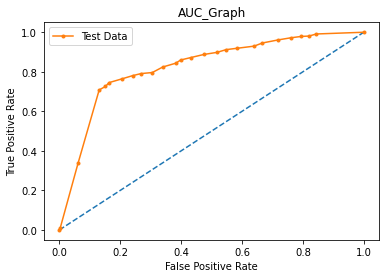

Inference
	 We have performed cross validation thrice with best score of 0.64
	 The best parameters are  {'bootstrap': False, 'max_depth': 15, 'max_features': 'auto', 'n_estimators': 50}
	 We have a medium  accuracy of 0.842 in test data
	 We have a medium AUC of 0.827 in test data
	 Based on priority of churning
	 Precision  of 1= 0.523, very bad value 
	 Recall or sensitivity of 1 = 0.708, bad value 
	 f1 score of 1 = 0.602, very bad value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,RF,Test,0,0.936,0.869,0.902,0.842,0.64,0.827,True,False
1,RF,Test,1,0.523,0.708,0.602,0.842,0.64,0.827,True,False


Best Parameters {'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 150}
Best Score: 0.6887337567410259
AUC for the Test Data: 0.857


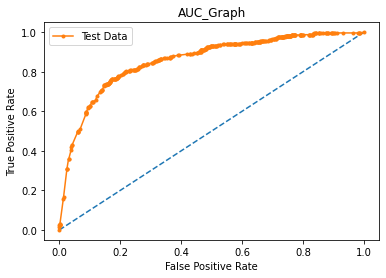

Inference
	 We have performed cross validation thrice with best score of 0.689
	 The best parameters are  {'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 150}
	 We have a good  accuracy of 0.855 in test data
	 We have a good AUC of 0.857 in test data
	 Based on priority of churning
	 Precision  of 1= 0.561, very bad value 
	 Recall or sensitivity of 1 = 0.629, very bad value 
	 f1 score of 1 = 0.593, very bad value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,RF,Test,0,0.923,0.900,0.912,0.855,0.689,0.857,True,False
1,RF,Test,1,0.561,0.629,0.593,0.855,0.689,0.857,True,False


Best Parameters {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 150}
Best Score: 0.8225227364567962
AUC for the Test Data: 0.910


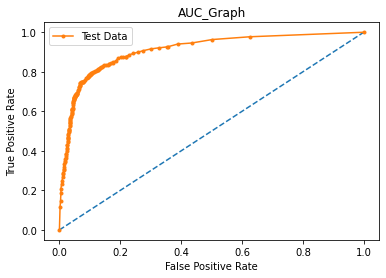

Inference
	 We have performed cross validation thrice with best score of 0.823
	 The best parameters are  {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 150}
	 We have a good  accuracy of 0.902 in test data
	 We have a good AUC of 0.91 in test data
	 Based on priority of churning
	 Precision  of 1= 0.717, bad value 
	 Recall or sensitivity of 1 = 0.687, bad value 
	 f1 score of 1 = 0.702, bad value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,RF,Test,0,0.937,0.945,0.941,0.902,0.823,0.91,True,False
1,RF,Test,1,0.717,0.687,0.702,0.902,0.823,0.91,True,False


Best Parameters {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 50}
Best Score: 0.8152579796951086
AUC for the Test Data: 0.936


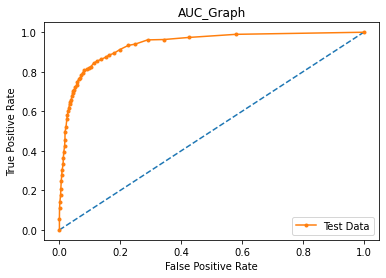

Inference
	 We have performed cross validation thrice with best score of 0.815
	 The best parameters are  {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 50}
	 We have a good  accuracy of 0.911 in test data
	 We have a good AUC of 0.936 in test data
	 Based on priority of churning
	 Precision  of 1= 0.756, medium value 
	 Recall or sensitivity of 1 = 0.701, bad value 
	 f1 score of 1 = 0.727, bad value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,RF,Test,0,0.940,0.954,0.947,0.911,0.815,0.936,True,False
1,RF,Test,1,0.756,0.701,0.727,0.911,0.815,0.936,True,False


Best Parameters {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}
Best Score: 0.8331000074468319
AUC for the Test Data: 0.960


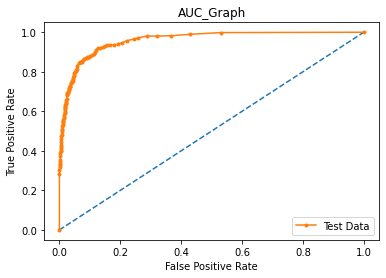

Inference
	 We have performed cross validation thrice with best score of 0.833
	 The best parameters are  {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}
	 We have a good  accuracy of 0.927 in test data
	 We have a very good AUC of 0.96 in test data
	 Based on priority of churning
	 Precision  of 1= 0.823, medium value 
	 Recall or sensitivity of 1 = 0.719, bad value 
	 f1 score of 1 = 0.767, medium value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,RF,Test,0,0.944,0.969,0.956,0.927,0.833,0.96,True,False
1,RF,Test,1,0.823,0.719,0.767,0.927,0.833,0.96,True,False


Best Parameters {'bootstrap': False, 'max_depth': 15, 'max_features': 'auto', 'n_estimators': 50}
Best Score: 0.8505453220268122
AUC for the Test Data: 0.955


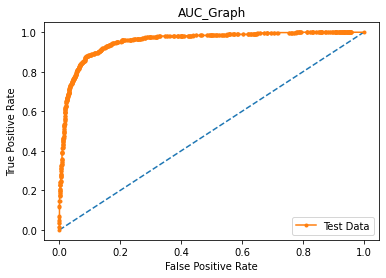

Inference
	 We have performed cross validation thrice with best score of 0.851
	 The best parameters are  {'bootstrap': False, 'max_depth': 15, 'max_features': 'auto', 'n_estimators': 50}
	 We have a good  accuracy of 0.924 in test data
	 We have a very good AUC of 0.955 in test data
	 Based on priority of churning
	 Precision  of 1= 0.814, medium value 
	 Recall or sensitivity of 1 = 0.708, bad value 
	 f1 score of 1 = 0.758, medium value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,RF,Test,0,0.942,0.967,0.955,0.924,0.851,0.955,True,False
1,RF,Test,1,0.814,0.708,0.758,0.924,0.851,0.955,True,False


Best Parameters {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}
Best Score: 0.8765116095896616
AUC for the Test Data: 0.967


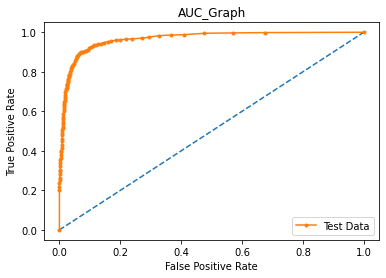

Inference
	 We have performed cross validation thrice with best score of 0.877
	 The best parameters are  {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}
	 We have a good  accuracy of 0.935 in test data
	 We have a very good AUC of 0.967 in test data
	 Based on priority of churning
	 Precision  of 1= 0.845, medium value 
	 Recall or sensitivity of 1 = 0.756, medium value 
	 f1 score of 1 = 0.798, medium value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,RF,Test,0,0.952,0.972,0.962,0.935,0.877,0.967,True,False
1,RF,Test,1,0.845,0.756,0.798,0.935,0.877,0.967,True,False


Best Parameters {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 150}
Best Score: 0.8944124155392276
AUC for the Test Data: 0.977


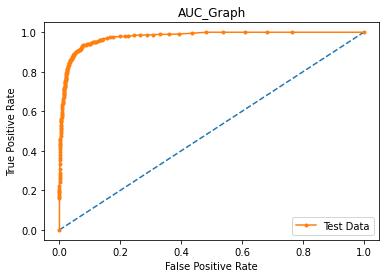

Inference
	 We have performed cross validation thrice with best score of 0.894
	 The best parameters are  {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 150}
	 We have a good  accuracy of 0.945 in test data
	 We have a very good AUC of 0.977 in test data
	 Based on priority of churning
	 Precision  of 1= 0.876, good value 
	 Recall or sensitivity of 1 = 0.784, medium value 
	 f1 score of 1 = 0.827, medium value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,RF,Test,0,0.957,0.978,0.967,0.945,0.894,0.977,True,False
1,RF,Test,1,0.876,0.784,0.827,0.945,0.894,0.977,True,False


Best Parameters {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 150}
Best Score: 0.8898145345822209
AUC for the Test Data: 0.980


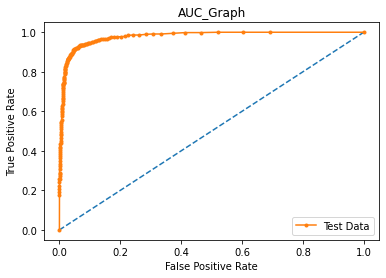

Inference
	 We have performed cross validation thrice with best score of 0.89
	 The best parameters are  {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 150}
	 We have a very good  accuracy of 0.954 in test data
	 We have a very good AUC of 0.98 in test data
	 Based on priority of churning
	 Precision  of 1= 0.891, good value 
	 Recall or sensitivity of 1 = 0.83, medium value 
	 f1 score of 1 = 0.859, good value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,RF,Test,0,0.966,0.979,0.973,0.954,0.89,0.98,True,False
1,RF,Test,1,0.891,0.830,0.859,0.954,0.89,0.98,True,False


Best Parameters {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 50}
Best Score: 0.9172995666836193
AUC for the Test Data: 0.984


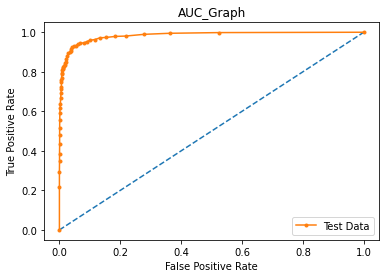

Inference
	 We have performed cross validation thrice with best score of 0.917
	 The best parameters are  {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 50}
	 We have a very good  accuracy of 0.96 in test data
	 We have a very good AUC of 0.984 in test data
	 Based on priority of churning
	 Precision  of 1= 0.922, good value 
	 Recall or sensitivity of 1 = 0.831, medium value 
	 f1 score of 1 = 0.874, good value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,RF,Test,0,0.966,0.986,0.976,0.96,0.917,0.984,True,False
1,RF,Test,1,0.922,0.831,0.874,0.96,0.917,0.984,True,False


Best Parameters {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 150}
Best Score: 0.931192893549197
AUC for the Test Data: 0.991


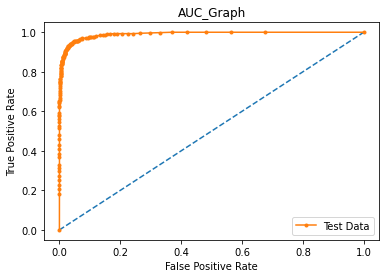

Inference
	 We have performed cross validation thrice with best score of 0.931
	 The best parameters are  {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 150}
	 We have a very good  accuracy of 0.968 in test data
	 We have a very good AUC of 0.991 in test data
	 Based on priority of churning
	 Precision  of 1= 0.929, good value 
	 Recall or sensitivity of 1 = 0.877, good value 
	 f1 score of 1 = 0.902, good value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,RF,Test,0,0.975,0.986,0.981,0.968,0.931,0.991,True,False
1,RF,Test,1,0.929,0.877,0.902,0.968,0.931,0.991,True,False


Best Parameters {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 50}
Best Score: 0.9284961681773117
AUC for the Test Data: 0.992


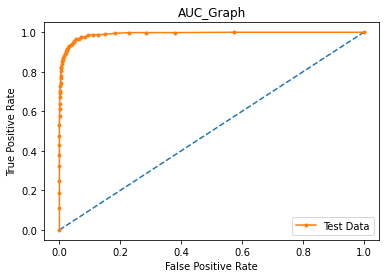

Inference
	 We have performed cross validation thrice with best score of 0.928
	 The best parameters are  {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 50}
	 We have a very good  accuracy of 0.968 in test data
	 We have a very good AUC of 0.992 in test data
	 Based on priority of churning
	 Precision  of 1= 0.934, good value 
	 Recall or sensitivity of 1 = 0.872, good value 
	 f1 score of 1 = 0.902, good value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,RF,Test,0,0.974,0.988,0.981,0.968,0.928,0.992,True,False
1,RF,Test,1,0.934,0.872,0.902,0.968,0.928,0.992,True,False


Best Parameters {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 50}
Best Score: 0.9428776278891151
AUC for the Test Data: 0.992


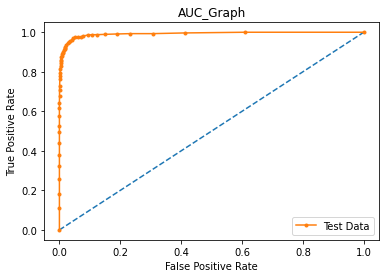

Inference
	 We have performed cross validation thrice with best score of 0.943
	 The best parameters are  {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 50}
	 We have a very good  accuracy of 0.973 in test data
	 We have a very good AUC of 0.992 in test data
	 Based on priority of churning
	 Precision  of 1= 0.947, good value 
	 Recall or sensitivity of 1 = 0.888, good value 
	 f1 score of 1 = 0.917, good value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,RF,Test,0,0.978,0.990,0.984,0.973,0.943,0.992,True,False
1,RF,Test,1,0.947,0.888,0.917,0.973,0.943,0.992,True,False


Best Parameters {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}
Best Score: 0.9455658009923775
AUC for the Test Data: 0.994


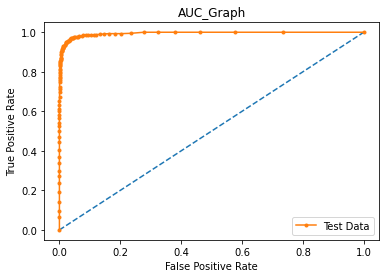

Inference
	 We have performed cross validation thrice with best score of 0.946
	 The best parameters are  {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}
	 We have a very good  accuracy of 0.977 in test data
	 We have a very good AUC of 0.994 in test data
	 Based on priority of churning
	 Precision  of 1= 0.968, very good value 
	 Recall or sensitivity of 1 = 0.891, good value 
	 f1 score of 1 = 0.928, good value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,RF,Test,0,0.978,0.994,0.986,0.977,0.946,0.994,True,False
1,RF,Test,1,0.968,0.891,0.928,0.977,0.946,0.994,True,False


Best Parameters {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 50}
Best Score: 0.9601010977676884
AUC for the Test Data: 0.996


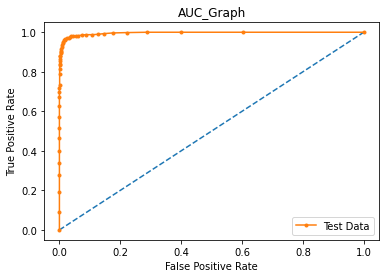

Inference
	 We have performed cross validation thrice with best score of 0.96
	 The best parameters are  {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 50}
	 We have a very good  accuracy of 0.98 in test data
	 We have a very good AUC of 0.996 in test data
	 Based on priority of churning
	 Precision  of 1= 0.972, very good value 
	 Recall or sensitivity of 1 = 0.907, good value 
	 f1 score of 1 = 0.938, good value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,RF,Test,0,0.981,0.995,0.988,0.98,0.96,0.996,True,False
1,RF,Test,1,0.972,0.907,0.938,0.98,0.96,0.996,True,False


Best Parameters {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 50}
Best Score: 0.954514476276351
AUC for the Test Data: 0.995


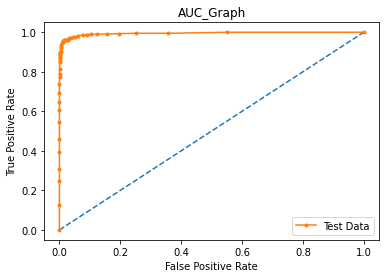

Inference
	 We have performed cross validation thrice with best score of 0.955
	 The best parameters are  {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 50}
	 We have a very good  accuracy of 0.983 in test data
	 We have a very good AUC of 0.995 in test data
	 Based on priority of churning
	 Precision  of 1= 0.978, very good value 
	 Recall or sensitivity of 1 = 0.921, good value 
	 f1 score of 1 = 0.948, good value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,RF,Test,0,0.984,0.996,0.990,0.983,0.955,0.995,True,False
1,RF,Test,1,0.978,0.921,0.948,0.983,0.955,0.995,True,False


Best Parameters {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 50}
Best Score: 0.95901205579471
AUC for the Test Data: 0.996


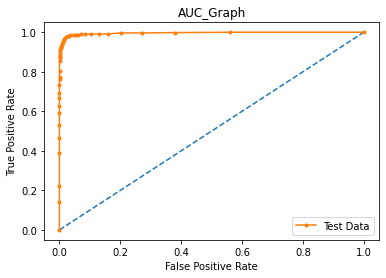

Inference
	 We have performed cross validation thrice with best score of 0.959
	 The best parameters are  {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 50}
	 We have a very good  accuracy of 0.983 in test data
	 We have a very good AUC of 0.996 in test data
	 Based on priority of churning
	 Precision  of 1= 0.974, very good value 
	 Recall or sensitivity of 1 = 0.924, good value 
	 f1 score of 1 = 0.949, good value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,RF,Test,0,0.985,0.995,0.990,0.983,0.959,0.996,True,False
1,RF,Test,1,0.974,0.924,0.949,0.983,0.959,0.996,True,False


In [172]:
col_list=rf2_imp['Variable'].to_list()
col_list
rf0d={}
mrf0d={}
i=-1
for j in col_list:
    
    i=i+1
    target='Churn'
    pl=col_list[0:i+1]
    pl.append(target)
    data=df3[pl].copy()
    name='RF'
    model_type=RandomForestClassifier(random_state=0)

    param_grid = {  'bootstrap': [True,False], 'max_depth': [10,15, None], 
                  'max_features': ['auto', 'log2'], 'n_estimators': [50,100,150]}

    rf0d[rf0l[i]],mrf0d[mrf0l[i]]=GS_analysis(data,target,param_grid,model_type,Ratio=0.30,print_values=False,
                       Scaled=False,apply_smote=[True,0.34],RA=True,
                      model_name=name,out_rem=False)
    display(round(rf0d[rf0l[i]],3))

In [184]:
rfd1=pd.DataFrame()
i=-1
opp={}
for j in col_list:
    
    i=i+1
    target='Churn'
    pl=col_list[0:i+1]
    rf0d[rf0l[i]]['No._of_Columns']=len(pl)
    op=pl[0]
    for k in pl[1:]:
        op=op+str('+')+ str(k)
        opp[i]=k
    rf0d[rf0l[i]]['Columns']=op

    pl.append(target)

    rfd=rf0d[rf0l[i]].drop(['Model','Test/Train','out_rem','SMOTE'],axis=1)
    rfd1=round(pd.concat([rfd,rfd1],axis=0),4)
#     display(round(rf0d[rf0l[i]],3))
rfd1.reset_index(inplace=True)
rfd1.drop('index',inplace=True,axis=1)
rfd1[rfd1['0/1']=='1']

,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,No._of_Columns,Columns
1,1,0.9741,0.9244,0.9486,0.9831,0.9590,0.9963,17,Tenure+Day_Since_CC_connect+cashback+CC_Contac...
3,1,0.9776,0.9209,0.9484,0.9831,0.9545,0.9947,16,Tenure+Day_Since_CC_connect+cashback+CC_Contac...
5,1,0.9718,0.9069,0.9382,0.9799,0.9601,0.9961,15,Tenure+Day_Since_CC_connect+cashback+CC_Contac...
7,1,0.9676,0.8910,0.9277,0.9766,0.9456,0.9945,14,Tenure+Day_Since_CC_connect+cashback+CC_Contac...
9,1,0.9475,0.8875,0.9165,0.9728,0.9429,0.9923,13,Tenure+Day_Since_CC_connect+cashback+CC_Contac...
11,1,0.9341,0.8717,0.9018,0.9680,0.9285,0.9916,12,Tenure+Day_Since_CC_connect+cashback+CC_Contac...
13,1,0.9292,0.8770,0.9024,0.9680,0.9312,0.9910,11,Tenure+Day_Since_CC_connect+cashback+CC_Contac...
15,1,0.9220,0.8313,0.8743,0.9597,0.9173,0.9837,10,Tenure+Day_Since_CC_connect+cashback+CC_Contac...
17,1,0.8906,0.8295,0.8590,0.9541,0.8898,0.9797,9,Tenure+Day_Since_CC_connect+cashback+CC_Contac...
19,1,0.8762,0.7838,0.8275,0.9449,0.8944,0.9768,8,Tenure+Day_Since_CC_connect+cashback+CC_Contac...


In [189]:
opp

{1: 'Day_Since_CC_connect',
 2: 'cashback',
 3: 'CC_Contacted_LY',
 4: 'rev_growth_yoy',
 5: 'rev_per_month',
 6: 'Account_user_count',
 7: 'CC_Agent_Score',
 8: 'account_segment',
 9: 'Complain_ly',
 10: 'Payment',
 11: 'coupon_used_for_payment',
 12: 'Marital_Status',
 13: 'Login_device',
 14: 'City_Tier',
 15: 'Gender',
 16: 'Service_Score'}

In [194]:
# pd.DataFrame(rfd1[rfd1['0/1']=='1']['recall'].diff(1))
ps1=pd.DataFrame(-rfd1[rfd1['0/1']=='1']['recall'].diff(1))
ps1=pd.concat([rfd1[rfd1['0/1']=='1']['No._of_Columns'],ps1],axis=1)
ps1

,No._of_Columns,recall
1,17,NaN
3,16,0.0035
5,15,0.0140
7,14,0.0159
9,13,0.0035
11,12,0.0158
13,11,-0.0053
15,10,0.0457
17,9,0.0018
19,8,0.0457


In [188]:

ps=pd.DataFrame(-rfd1[rfd1['0/1']=='1']['accuracy'].diff(1))
ps=pd.concat([rfd1[rfd1['0/1']=='1']['No._of_Columns'],ps],axis=1)
ps

,No._of_Columns,accuracy
1,17,NaN
3,16,-0.0000
5,15,0.0032
7,14,0.0033
9,13,0.0038
11,12,0.0048
13,11,-0.0000
15,10,0.0083
17,9,0.0056
19,8,0.0092


In [199]:
imp


['cashback',
 'rev_growth_yoy',
 'Day_Since_CC_connect',
 'Account_user_count',
 'CC_Contacted_LY',
 'CC_Agent_Score',
 'account_segment',
 'Payment',
 'City_Tier',
 'Churn']

Best Parameters {'bootstrap': False, 'max_depth': 15, 'max_features': 'auto', 'n_estimators': 150}
Best Score: 0.9355603608187321
AUC for the Test Data: 0.978


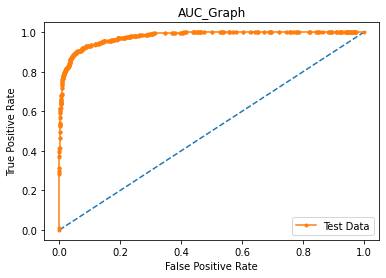

Inference
	 We have performed cross validation thrice with best score of 0.936
	 The best parameters are  {'bootstrap': False, 'max_depth': 15, 'max_features': 'auto', 'n_estimators': 150}
	 We have a very good  accuracy of 0.952 in test data
	 We have a very good AUC of 0.978 in test data
	 Based on priority of churning
	 Precision  of 1= 0.932, good value 
	 Recall or sensitivity of 1 = 0.77, medium value 
	 f1 score of 1 = 0.843, medium value 


,Model,Test/Train,0/1,precision,recall,f1-score,accuracy,Best_Score,AUC,SMOTE,out_rem
0,RF,Test,0,0.955,0.989,0.971,0.952,0.936,0.978,True,False
1,RF,Test,1,0.932,0.770,0.843,0.952,0.936,0.978,True,False


In [195]:
imp=[]
for i in [2,4,1,6,3,7,8,10,14,12]:
    imp.append(opp[i])
target='Churn'
imp.append(target)
data=df3[imp].copy()
name='RF'
model_type=RandomForestClassifier(random_state=0)

param_grid = {  'bootstrap': [True,False], 'max_depth': [10,15, None], 
              'max_features': ['auto', 'log2'], 'n_estimators': [50,100,150]}

rf04,mrf04=GS_analysis(data,target,param_grid,model_type,Ratio=0.30,print_values=False,
                   Scaled=False,apply_smote=[True,0.34],RA=True,
                  model_name=name,out_rem=False)
round(rf04,3)

## Inference
     Random forest  is the most optimum models with highest values over all models in accuracy,precision,recall,f1_score
     We have performed cross validation thrice with best score of 0.971
	 The best parameters are  {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}
	 We have a very good  accuracy of 0.98 in test data
	 We have a very good AUC of 0.997 in test data
	 Based on priority of churning
	 Precision  of 1= 0.992, very good value 
	 Recall or sensitivity of 1 = 0.888, good value 
	 f1 score of 1 = 0.937, good value
     Important columns
     Tenure	 is most important feature with feature importance of 0.228 followed by
     cashback with feature importance of 0.075445
     account_seg criteria remains least important
     

    The next best classifier is bagging classifier but random forest is a part of bagging classifier so both models are similar
    So the next best classifier is KNN classifier
    Naive Bayes shouldn't used as it has the least scores
    The most important parameter to be taken into consideration 'recall' as it represents mis identified churners ratio